In [3]:
import pickle
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import warnings
import copy
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import pandas as pd
import scienceplots
from copy import deepcopy
import matplotlib
import torch.utils.data as data
from options import arg_parser
from torch.utils.data import Subset
from torch.utils.data.dataset import Dataset
from torchvision.datasets import MNIST
from scipy.stats import spearmanr
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torch.utils import data
plt.rcParams['figure.dpi'] = 300
plt.style.use(['science'])
plt.rcParams.update({'font.size': 12})
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error, log_loss, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter

from scipy.stats import entropy

# lines_colour_cycle = [p['color'] for p in plt.rcParams['axes.prop_cycle']]

In [4]:
adult_to_plot = []
glioma_to_plot = []
pubcov_to_plot = []

In [58]:
print(adult_to_plot)

[{'Influence Estimated - Retrain Loss': array([-0.025679  , -0.02912033, -0.042646  , -0.022208  , -0.011816  ,
       -0.00351067, -0.001131  ]), 'std': array([0.00468322, 0.00277863, 0.0073584 , 0.00347923, 0.00112554,
       0.00189716, 0.00121026]), 'Retraining Loss': array([0.75225167, 0.734995  , 0.72537133, 0.675379  , 0.664455  ,
       0.662979  , 0.66029967]), 'Influence Estimated Loss': array([0.72657267, 0.70587467, 0.68272533, 0.653171  , 0.652639  ,
       0.65946833, 0.65916867]), '$\\epsilon$': [0.1, 0.5, 1, 2, 3, 4, 5]}, {'Influence Estimated - Retrain Loss': array([-0.01732333, -0.02519333, -0.037898  , -0.02201233, -0.00970533,
       -0.002299  ]), 'std': array([0.00136982, 0.00160043, 0.00490249, 0.00492076, 0.00126396,
       0.00147904]), 'Retraining Loss': array([0.74258967, 0.73255833, 0.71960167, 0.683455  , 0.663292  ,
       0.66240867]), 'Influence Estimated Loss': array([0.72526633, 0.707365  , 0.68170367, 0.66144267, 0.65358667,
       0.66010967]), '$\\e

In [4]:
adult_to_plot = []

In [35]:
pubcov_unbalanced = []

In [55]:
pubcov_multiple = []

In [102]:
removal = []

In [16]:
q1 = {'adult':[],
      'glioma':[],
      'pubcov':[]}

In [12]:
print(q1['adult'])

[]


In [19]:

all_to_plot = []
d_ = 'glioma'
to_do = [10, 5, 4, 3, 2, 1]
for t in to_do:
    print(f'\n\n\nFor number changed = {t}')
    print('--------------------------------------------------')
    with open(f'/home/ancarey/influence/final_results/{d_}/{d_}_data_{t}.0_results.pkl', 'rb') as f:  
        all_data = pickle.load(f)
    # with open(f'/home/ancarey/influence/{d_}_data_{t}.0_results_removal.pkl', 'rb') as f:  
    #     all_data = pickle.load(f)
    with open(f'/home/ancarey/influence/{d_}_data_{t}.0_results_redo_inf_calc.pkl', 'rb') as f:  
        redo_data = pickle.load(f)

    normal_loss_avg = round(np.average(all_data['normal_losses']),3)
    normal_loss_std = round(np.std(all_data['normal_losses']),3)

    normal_acc_avg = round(np.average(all_data['normal_accs']),2)
    normal_acc_std = round(np.std(all_data['normal_accs']),2)


    print(f'Normal Loss: Avg - {normal_loss_avg} STD - {normal_loss_std}')
    print(f'Normal Acc: Avg - {normal_acc_avg} STD - {normal_acc_std}')

    print('')

    # for k in all_data['change_losses'].keys():
    #     print('\n', k)
    #     print(all_data['change_accs'][k])
    #     print(all_data['pert_accs'][k])
   
    change_loss_avgs = []
    change_loss_stds = []
    change_acc_avgs = []
    change_acc_stds = []

    for k in all_data['change_losses'].keys():
        change_loss_avgs.append(round(np.average(all_data['change_losses'][k]),3))
        change_loss_stds.append(round(np.std(all_data['change_losses'][k]),3))

        change_acc_avgs.append(round(np.average(all_data['change_accs'][k]),2))
        change_acc_stds.append(round(np.std(all_data['change_accs'][k]), 2))

    pert_loss_avgs = []
    pert_loss_stds = []
    pert_acc_avgs = []
    pert_acc_stds = []

    for k in all_data['pert_losses'].keys():
        pert_loss_avgs.append(round(np.average(all_data['pert_losses'][k]),3))
        pert_loss_stds.append(round(np.std(all_data['pert_losses'][k]),3))

        pert_acc_avgs.append(round(np.average(all_data['pert_accs'][k]),2))
        pert_acc_stds.append(round(np.std(all_data['pert_accs'][k]), 2))

    to_plot_change = []
    to_plot_acc = []
    to_plot_std = []
    to_plot_inf = []
    epsilons = []
    rl = []
    il = []
    ed = []
    percentages = []
    dataset = []
    for i, k in enumerate(all_data['pert_losses'].keys()):
        epsilons.append(k)
        percentages.append(str(t))
        dataset.append(d_)

        loss_diff = np.array(all_data['pert_losses'][k])- np.array(all_data['change_losses'][k])
        acc_diff = (np.array(all_data['pert_accs'][k]))-(np.array(all_data['change_accs'][k])) 


        elements = [i for i in range(len(acc_diff))]
        ordered_acc = np.vstack((elements, acc_diff))
        ordered_acc = ordered_acc[:, ordered_acc[1,:].argsort()]

        best = list(ordered_acc[0,-3:])
        best = [int(b) for b in best]

        best_losses = [l for i, l in enumerate(loss_diff) if i in best]
        best_accs = [a for i, a in enumerate(acc_diff) if i in best]

        retrain_losses = [l for i, l in enumerate(all_data['change_losses'][k]) if i in best]
        influence_losses = [l for i, l in enumerate(all_data['pert_losses'][k]) if i in best]

        rl.append(np.mean(retrain_losses))
        il.append(np.mean(influence_losses))

        to_plot_change.append(np.mean(np.array(best_losses)))
        to_plot_std.append(np.std(np.array(best_losses)))
        to_plot_acc.append(np.mean(np.array(best_accs)))
        
        loss_diffs = [round(np.average(best_losses),3), round(np.std(best_losses),3)]
        acc_diffs = [round(np.average(best_accs),2), round(np.std(best_accs),2)]

        best_infs = [inf for i, inf in enumerate(redo_data['pert_inf'][k]) if i in best]
        inf_avg = round(np.average(best_infs),3)
        inf_std = round(np.std(best_infs),3)


        eds = []
        for b in best:
            pp = all_data['pert_params'][k][b]
            ap = all_data['change_params'][k][b]
            eds.append(np.linalg.norm(np.array(pp) - np.array(ap)))
        aavg = np.average(eds)
        pavg = np.std(eds)

        print(f'Loss diff {k}: {loss_diffs}')
        print(f'Acc diff {k}: {acc_diffs}')
        print(f'Influence {k}: Avg - {inf_avg:.3f}  STD - {inf_std:.3f}')
        print(f'ED {k}: Avg - {aavg:.3f}  STD - {pavg:.3f}')
        ed.append(aavg)
        print('')
        print(percentages)

   
    df = {'Influence Estimated - Retrain Loss': np.array(to_plot_change),
          'Influence Estimated - Retrain Accuracy': np.array(to_plot_acc),
          'ED': ed,
          'std': np.array(to_plot_std),
          'Retraining Loss': np.array(rl),
          'Influence Estimated Loss': np.array(il),
          '$\epsilon_o$': percentages,
        #   'Influence Estimated Loss': to_plot_inf,
        '$\epsilon$': epsilons,
        'Dataset': dataset}
    q1[str(d_)].append(df)

        





For number changed = 10
--------------------------------------------------
Normal Loss: Avg - 0.512 STD - 0.037
Normal Acc: Avg - 78.04 STD - 4.0

Loss diff 0.1: [0.096, 0.031]
Acc diff 0.1: [-3.14, 1.47]
Influence 0.1: Avg - 0.031  STD - 0.032
ED 0.1: Avg - 1.462  STD - 0.283

['10']
Loss diff 0.5: [0.066, 0.021]
Acc diff 0.5: [-2.75, 3.09]
Influence 0.5: Avg - 0.025  STD - 0.024
ED 0.5: Avg - 1.321  STD - 0.287

['10', '10']
Loss diff 1: [0.044, 0.023]
Acc diff 1: [-5.1, 3.64]
Influence 1: Avg - 0.005  STD - 0.014
ED 1: Avg - 1.211  STD - 0.163

['10', '10', '10']
Loss diff 2: [0.038, 0.04]
Acc diff 2: [-1.96, 2.22]
Influence 2: Avg - -0.009  STD - 0.020
ED 2: Avg - 0.902  STD - 0.495

['10', '10', '10', '10']
Loss diff 3: [0.009, 0.009]
Acc diff 3: [0.0, 0.96]
Influence 3: Avg - -0.007  STD - 0.012
ED 3: Avg - 0.471  STD - 0.304

['10', '10', '10', '10', '10']
Loss diff 4: [0.006, 0.01]
Acc diff 4: [-1.18, 1.66]
Influence 4: Avg - 0.004  STD - 0.004
ED 4: Avg - 0.271  STD - 0.219

[{'Influence Estimated - Retrain Loss': array([-0.01025733]), 'Influence Estimated - Retrain Accuracy': array([2.36113333]), 'std': array([0.00291731]), 'Retraining Loss': array([0.694729]), 'Influence Estimated Loss': array([0.68447167]), '$\\epsilon_o$': ['1'], '$\\epsilon$': [1], 'Dataset': ['adult']}, {'Influence Estimated - Retrain Loss': array([-0.01771967]), 'Influence Estimated - Retrain Accuracy': array([1.11113333]), 'std': array([0.00353716]), 'Retraining Loss': array([0.70853067]), 'Influence Estimated Loss': array([0.690811]), '$\\epsilon_o$': ['2'], '$\\epsilon$': [1], 'Dataset': ['adult']}, {'Influence Estimated - Retrain Loss': array([-0.034199]), 'Influence Estimated - Retrain Accuracy': array([3.08333333]), 'std': array([0.01516784]), 'Retraining Loss': array([0.725765]), 'Influence Estimated Loss': array([0.691566]), '$\\epsilon_o$': ['3'], '$\\epsilon$': [1], 'Dataset': ['adult']}, {'Influence Estimated - Retrain Loss': array([-0.05061333]), 'Influence Estimated - R

Text(0.5, 1.0, 'Accuracy Difference')

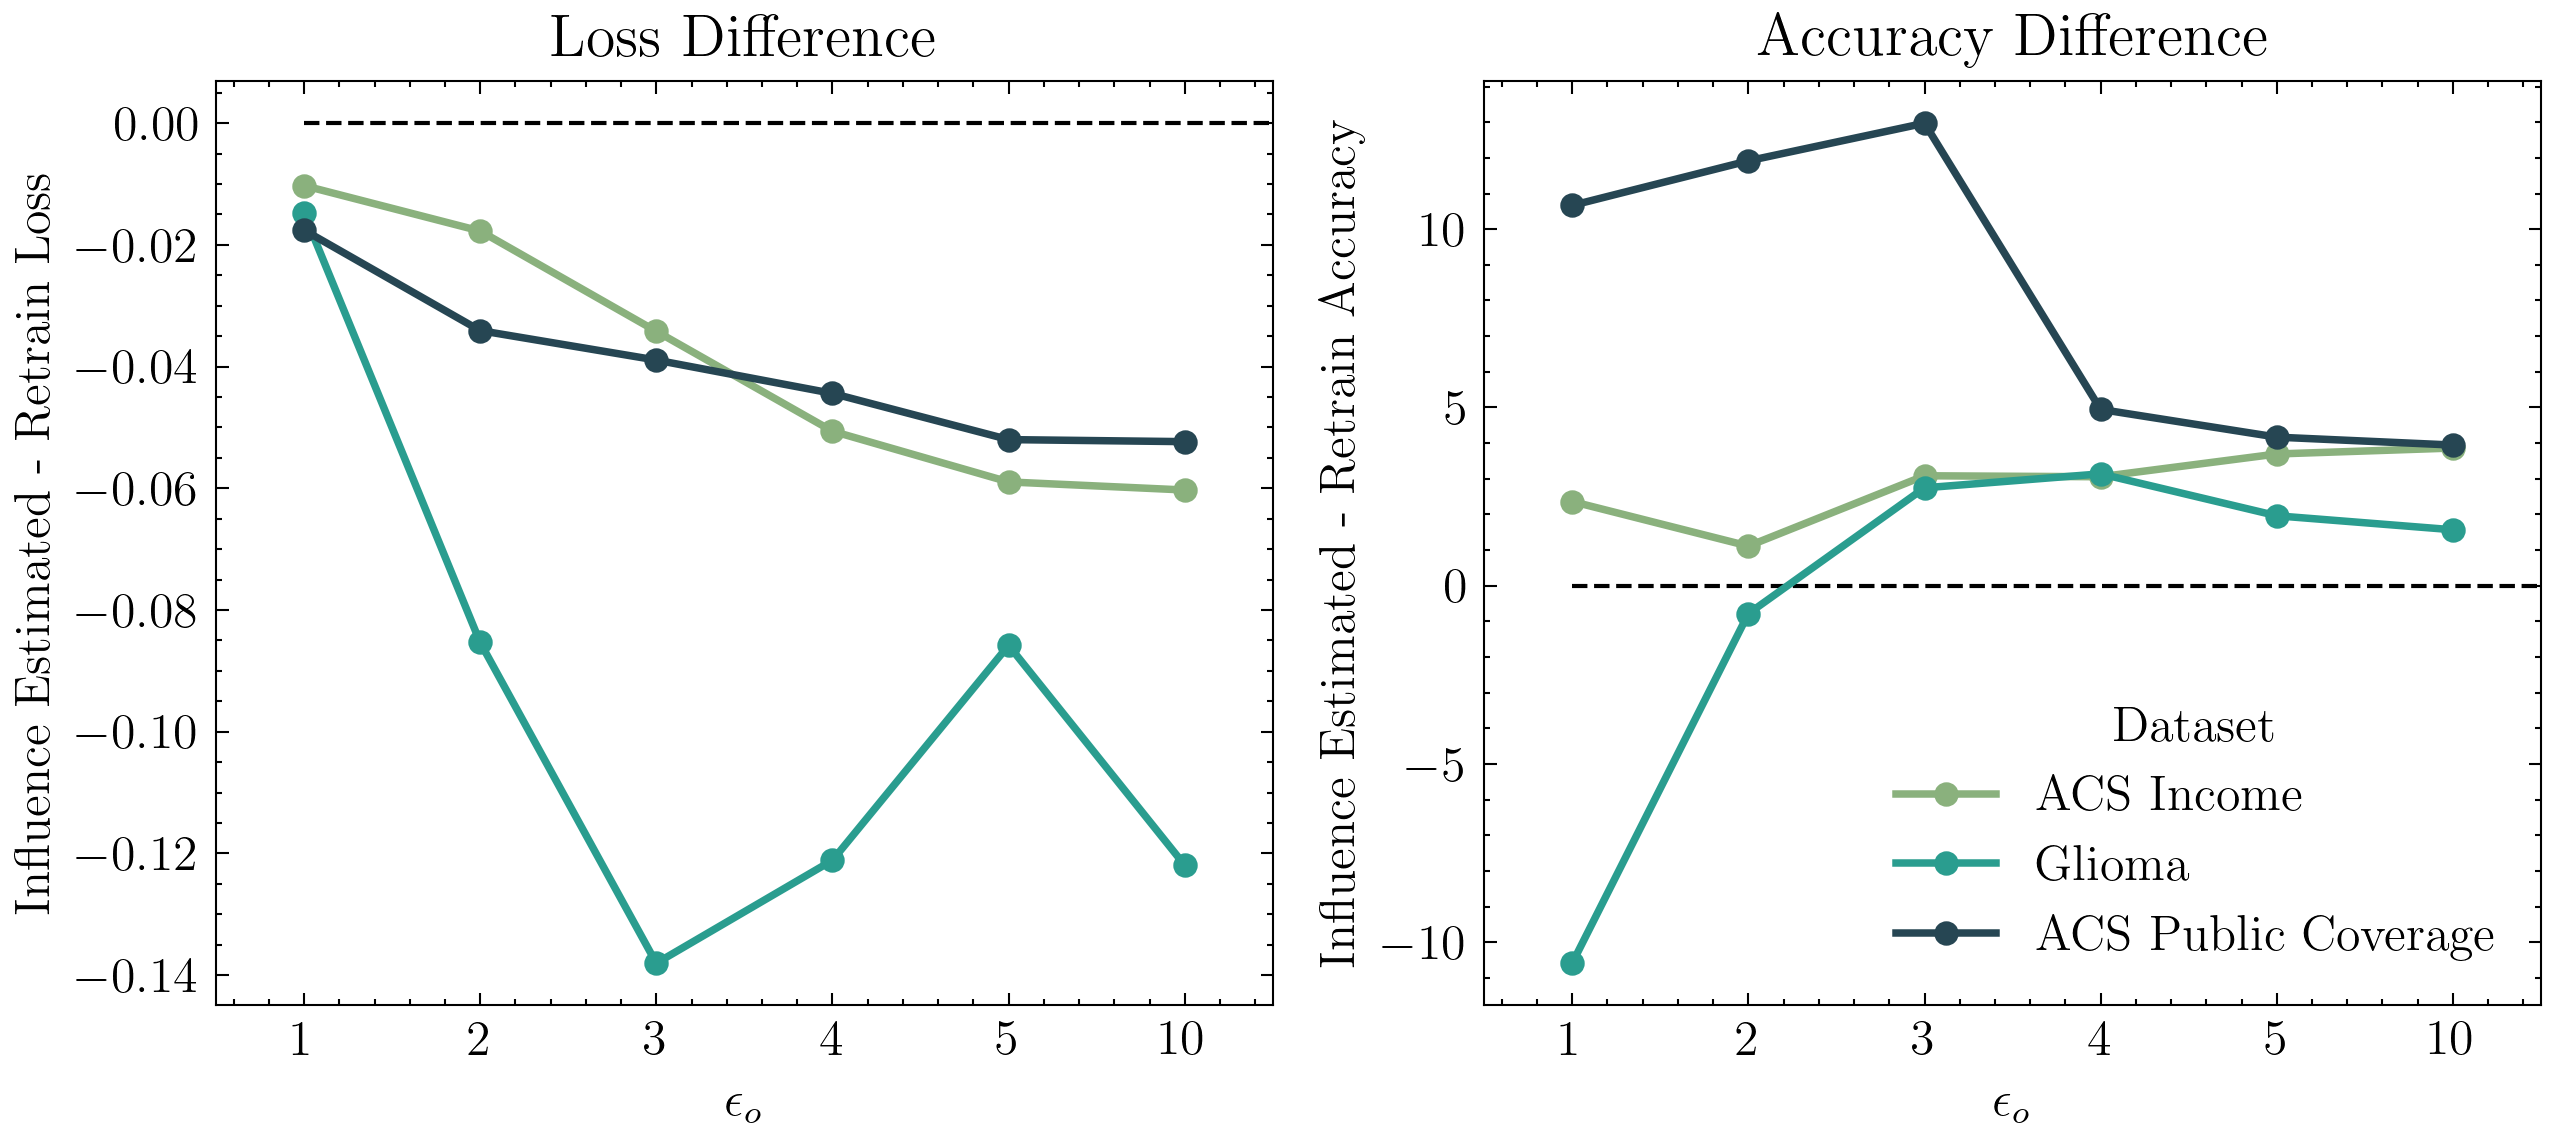

In [107]:

palette =  ["#8ab17d", "#2a9d8f","#264653"]

df = removal

sub = {'adult': 'ACS Income',
       'glioma': 'Glioma',
       'pubcov': 'ACS Public Coverage'
    
}
print(df)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

df_ = {"Influence Estimated - Retrain Loss": np.concatenate([df[i]["Influence Estimated - Retrain Loss"] for i in range(len(df))]),
      "Influence Estimated - Retrain Accuracy": np.concatenate([df[i]["Influence Estimated - Retrain Accuracy"] for i in range(len(df))]),
      "Dataset": [sub[word] for word in np.concatenate([df[i]["Dataset"] for i in range(len(df))])],
      "$\epsilon_c$": np.concatenate([df[i]["$\epsilon$"] for i in range(len(df))]),
      "$\epsilon_o$": np.concatenate([df[i]['$\epsilon_o$'] for i in range(len(df))])}

sns.lineplot(x=[0,6], y =[0,0], linestyle='--', color='black', ax=ax1)
sns.lineplot(x=[0,6], y =[0,0], linestyle='--', color='black', ax=ax2)
sns.pointplot(x="$\epsilon_o$",y="Influence Estimated - Retrain Loss", data=df_, hue="Dataset", palette=sns.color_palette(palette, len(palette)), ax=ax1, legend=False)
sns.pointplot(x="$\epsilon_o$",y="Influence Estimated - Retrain Accuracy", data=df_, hue="Dataset", palette=sns.color_palette(palette, len(palette)), ax=ax2, legend='full')

      # plt.legend(title="$\epsilon_o$")

ax1.set_title("Loss Difference")
ax2.set_title("Accuracy Difference")

# for i, df in enumerate(all_to_plot):
#       d = df["Actual - Influence Estimated Loss"]
#       x = df["$\epsilon$"]
#       err = df["std"]
#       ax.fill_between(x, d - err, d + err, alpha=0.2)


[{'Influence Estimated - Retrain Loss': array([0.00669117, 0.00887133]), 'Influence Estimated - Retrain Accuracy': array([-2.56948333, -1.97225   ]), 'std': array([0.00733636, 0.00673033]), 'Retraining Loss': array([0.689787  , 0.68074517]), 'Influence Estimated Loss': array([0.69647817, 0.6896165 ]), 'Num. Clients': ['1', '1'], '$\\epsilon$': [0.1, 0.5]}, {'Influence Estimated - Retrain Loss': array([0.07733567, 0.02999117]), 'Influence Estimated - Retrain Accuracy': array([-9.6528    , -4.70833333]), 'std': array([0.01941495, 0.0141101 ]), 'Retraining Loss': array([0.681834 , 0.6762035]), 'Influence Estimated Loss': array([0.75916967, 0.70619467]), 'Num. Clients': ['2', '2'], '$\\epsilon$': [0.1, 0.5]}, {'Influence Estimated - Retrain Loss': array([0.10684967, 0.04571033]), 'Influence Estimated - Retrain Accuracy': array([-14.81946667, -10.34721667]), 'std': array([0.05902017, 0.03149384]), 'Retraining Loss': array([0.681834 , 0.6762035]), 'Influence Estimated Loss': array([0.7886836

Text(0.5, 1.0, 'Accuracy Difference')

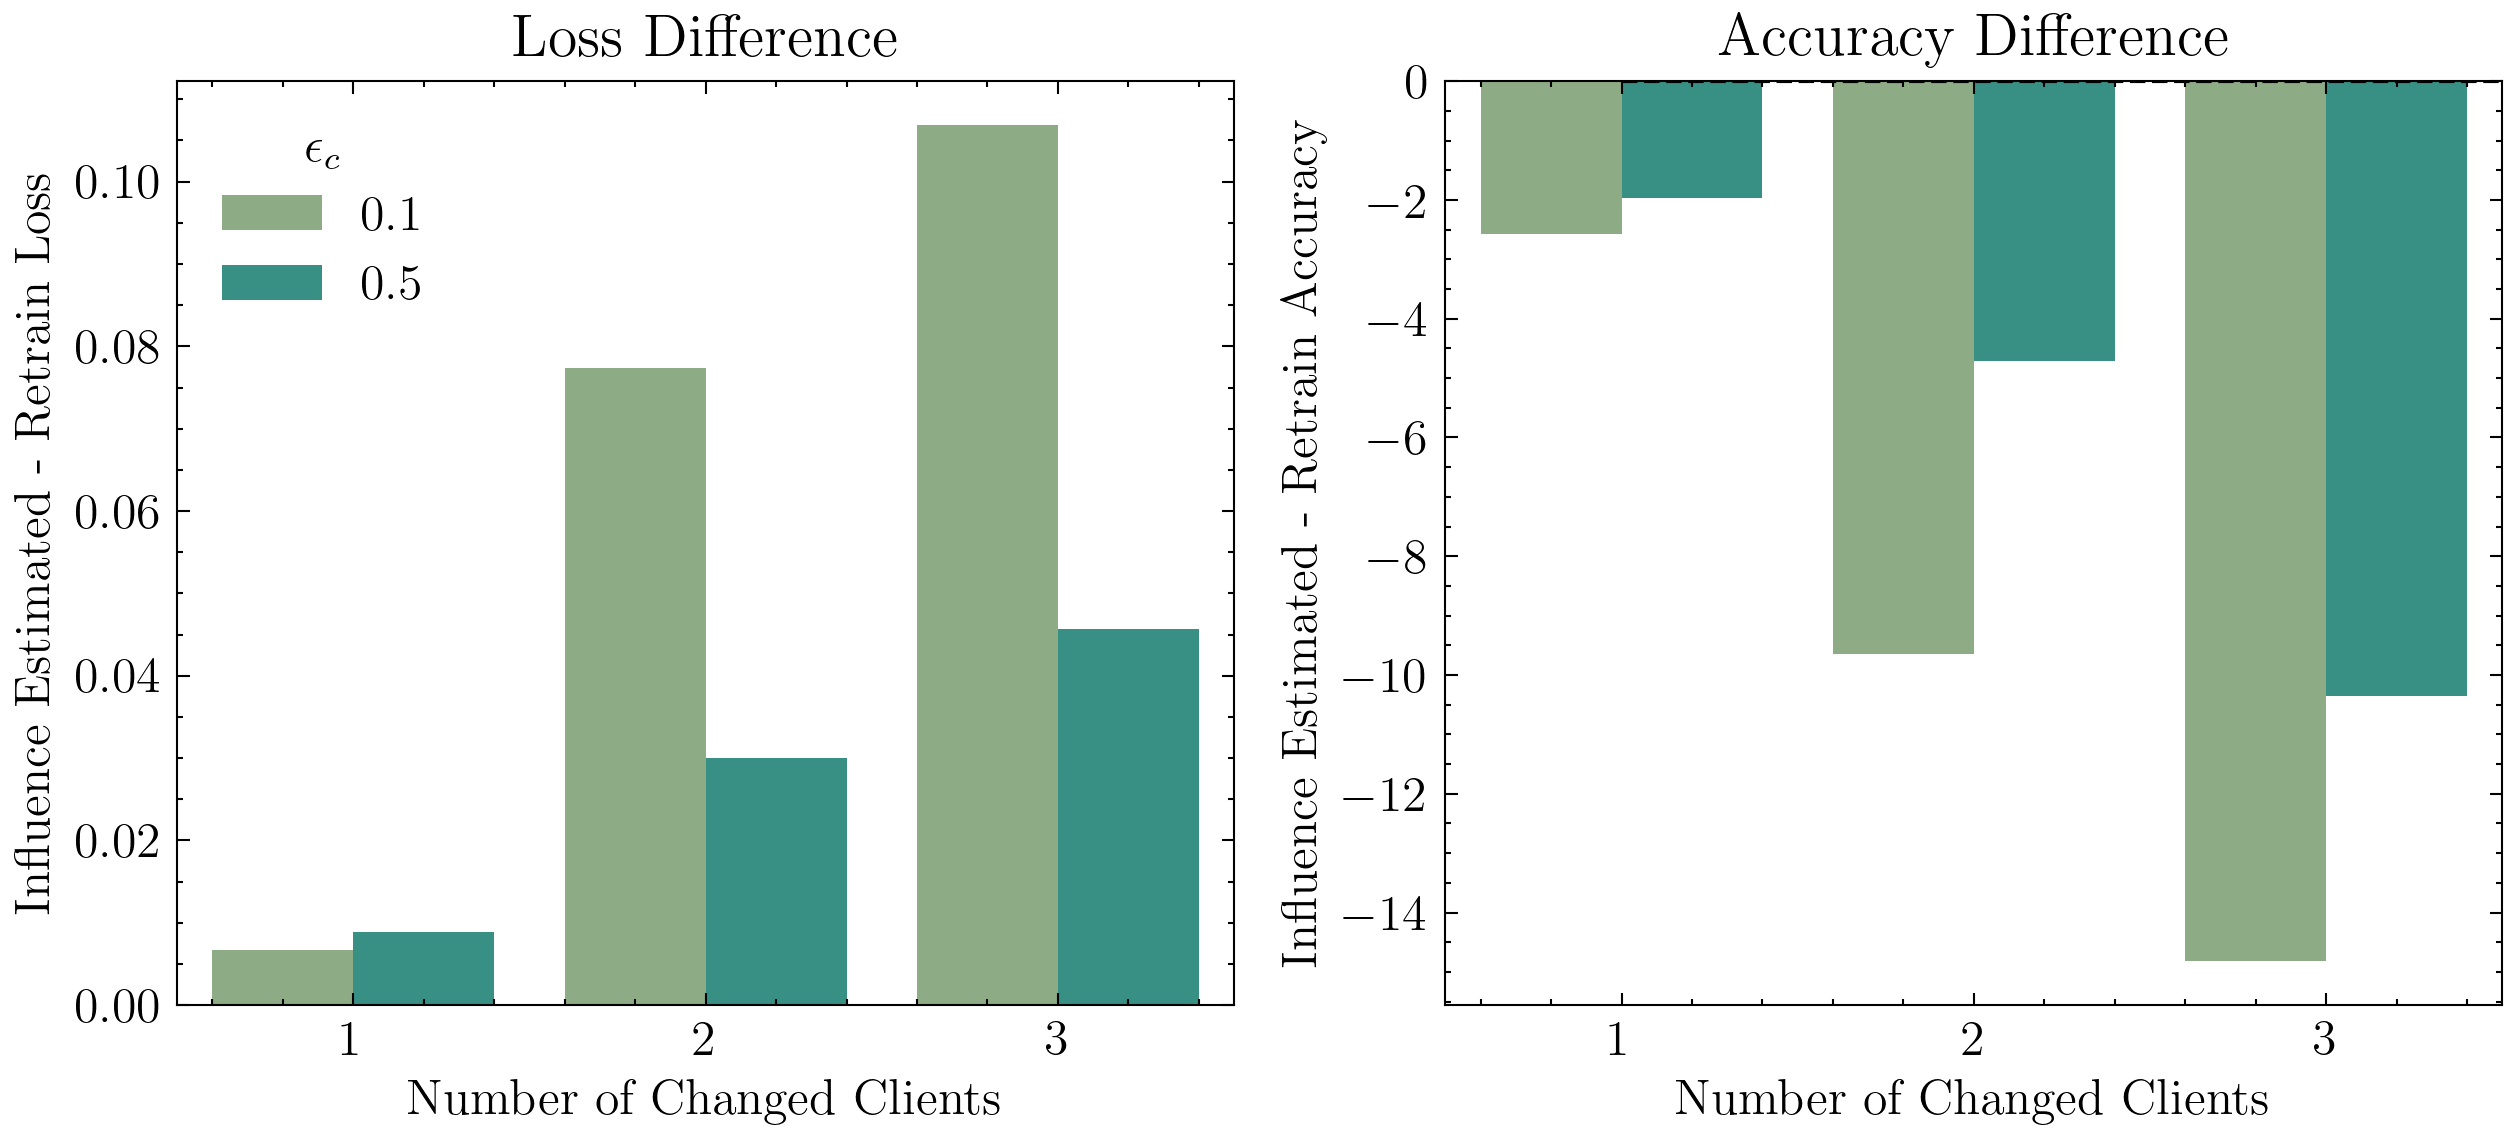

In [57]:
palette =  ["#8ab17d", "#2a9d8f"]

df = pubcov_multiple
print(df)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

df_ = {"Influence Estimated - Retrain Loss": np.concatenate([df[i]["Influence Estimated - Retrain Loss"] for i in range(len(df))]),
      "Influence Estimated - Retrain Accuracy": np.concatenate([df[i]["Influence Estimated - Retrain Accuracy"] for i in range(len(df))]),
      "Number of Changed Clients": np.concatenate([df[i]["Num. Clients"] for i in range(len(df))]),
      "$\epsilon_c$": np.concatenate([df[i]["$\epsilon$"] for i in range(len(df))])}

sns.lineplot(x=[0,6], y =[0,0], linestyle='--', color='black', ax=ax2)
sns.barplot(x="Number of Changed Clients",y="Influence Estimated - Retrain Loss", data=df_, hue="$\epsilon_c$", palette=sns.color_palette(palette, len(palette)), ax=ax1, legend='full')
sns.barplot(x="Number of Changed Clients",y="Influence Estimated - Retrain Accuracy", data=df_, hue="$\epsilon_c$", palette=sns.color_palette(palette, len(palette)), ax=ax2, legend=False)

      # plt.legend(title="$\epsilon_o$")

ax1.set_title("Loss Difference")
ax2.set_title("Accuracy Difference")


[{'Influence Estimated - Retrain Loss': array([0.009937, 0.004439]), 'Influence Estimated - Retrain Accuracy': array([-1.6389,  0.25  ]), 'std': array([0.00106224, 0.00146804]), 'Retraining Loss': array([0.65575067, 0.65083967]), 'Influence Estimated Loss': array([0.66568767, 0.65527867]), 'Percentage': ['20%', '20%'], '$\\epsilon$': [0.1, 0.5]}, {'Influence Estimated - Retrain Loss': array([0.01748467, 0.00765533]), 'Influence Estimated - Retrain Accuracy': array([-4.13883333, -0.69443333]), 'std': array([0.00792318, 0.0011381 ]), 'Retraining Loss': array([0.660802, 0.654578]), 'Influence Estimated Loss': array([0.67828667, 0.66223333]), 'Percentage': ['30%', '30%'], '$\\epsilon$': [0.1, 0.5]}, {'Influence Estimated - Retrain Loss': array([0.013571  , 0.01099533]), 'Influence Estimated - Retrain Accuracy': array([-5.6111    , -1.63886667]), 'std': array([0.00191058, 0.00954285]), 'Retraining Loss': array([0.67569267, 0.64863867]), 'Influence Estimated Loss': array([0.68926367, 0.65963

Text(0.5, 1.0, 'Accuracy Difference')

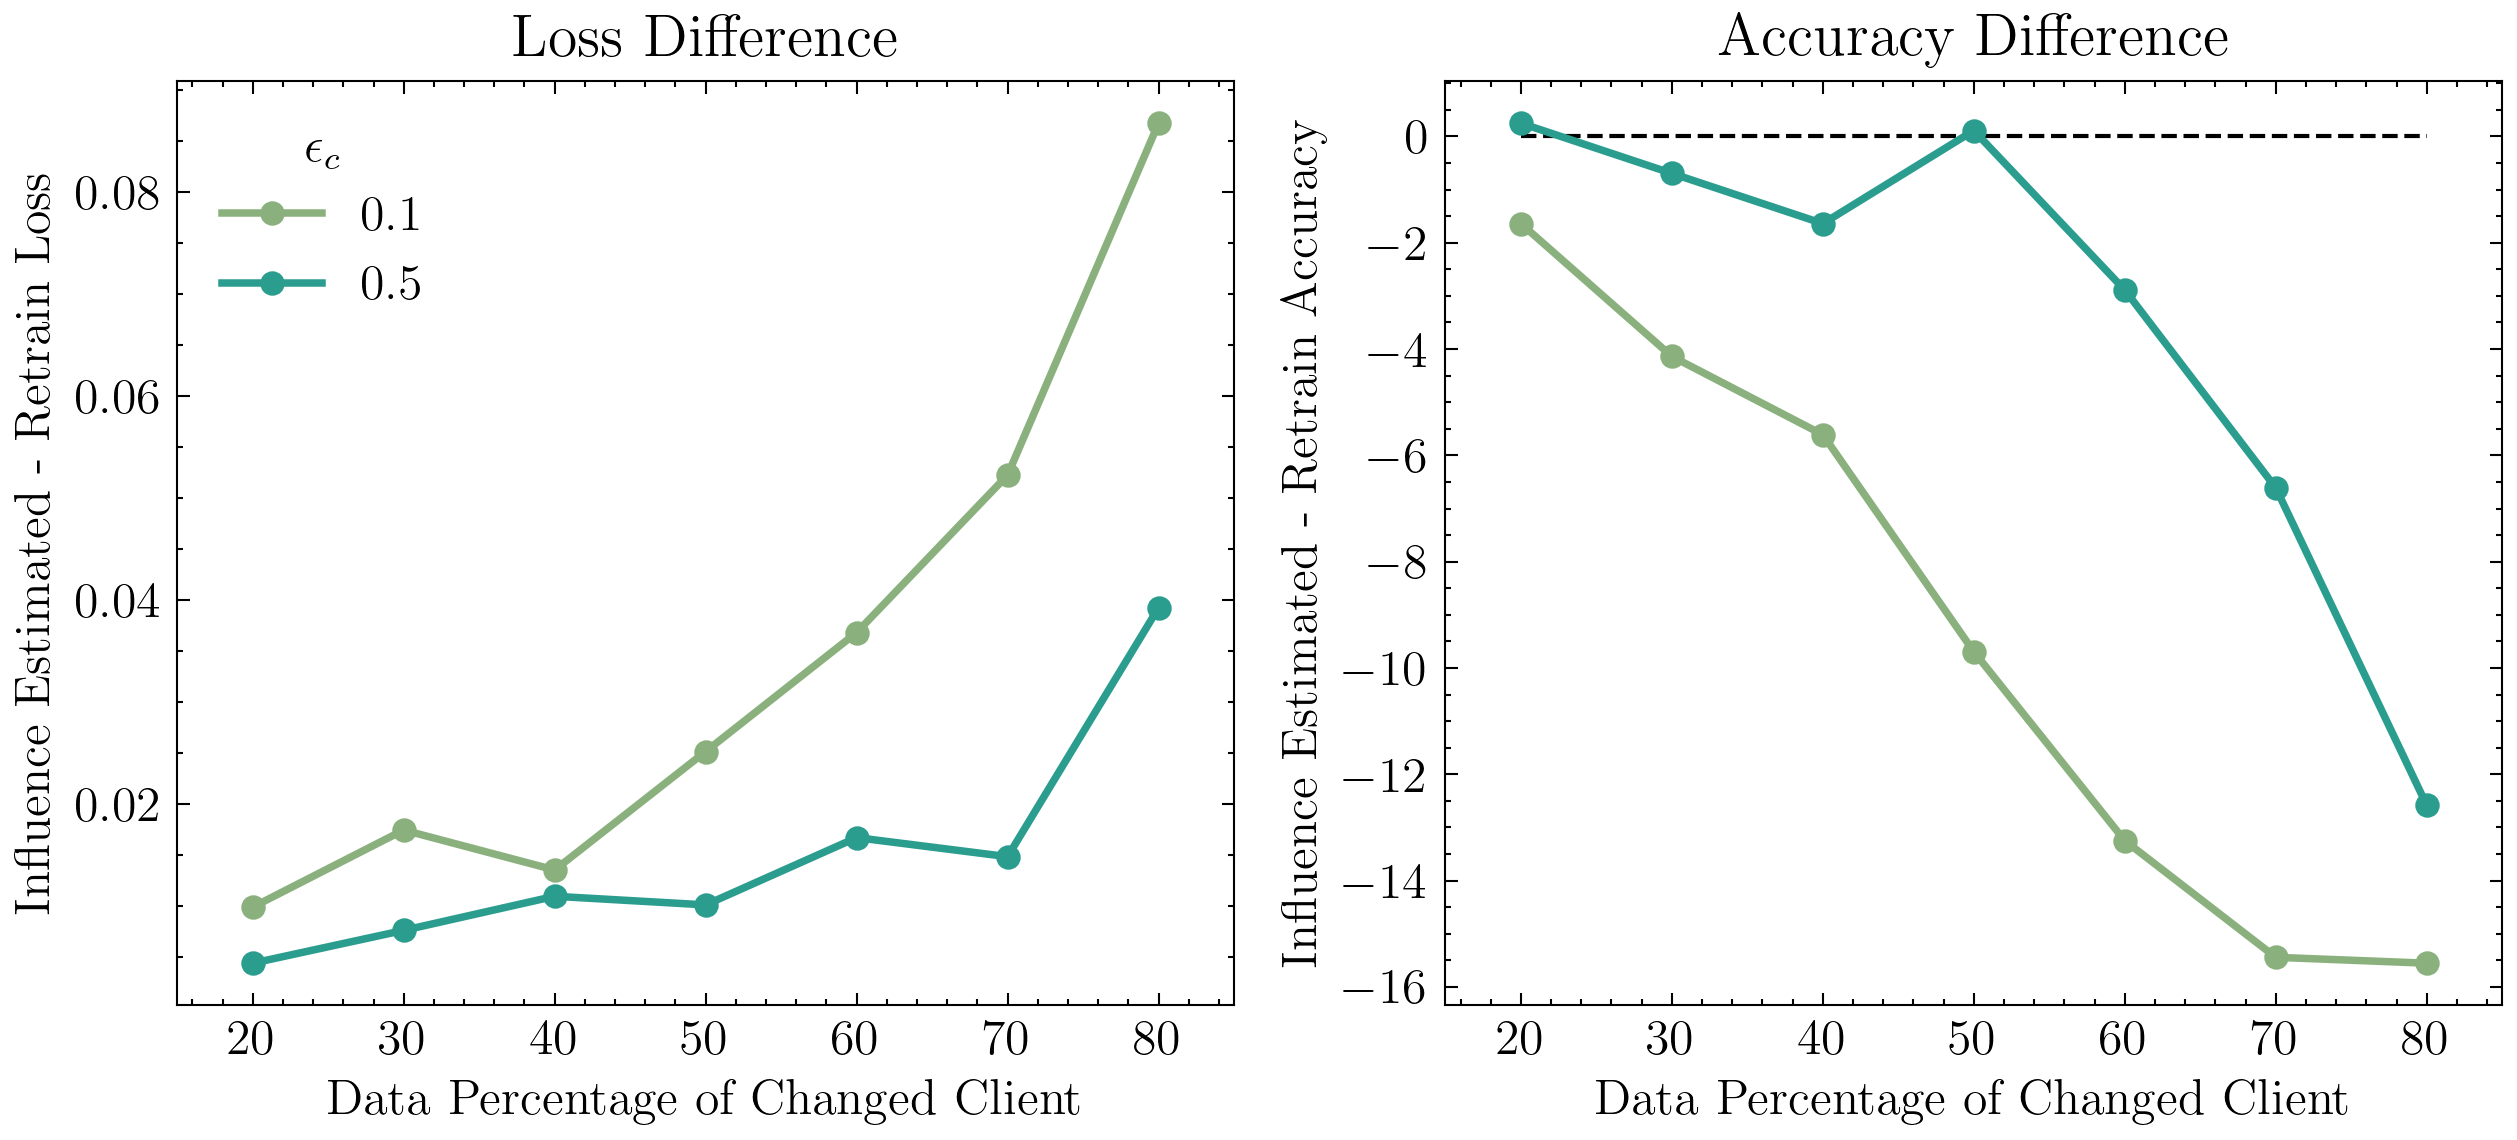

In [45]:
palette =  ["#8ab17d", "#2a9d8f"]

df = pubcov_unbalanced
print(df)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

df_ = {"Influence Estimated - Retrain Loss": np.concatenate([df[i]["Influence Estimated - Retrain Loss"] for i in range(len(df))]),
      "Influence Estimated - Retrain Accuracy": np.concatenate([df[i]["Influence Estimated - Retrain Accuracy"] for i in range(len(df))]),
      "Data Percentage of Changed Client": np.concatenate([df[i]["Percentage"] for i in range(len(df))]),
      "$\epsilon_c$": np.concatenate([df[i]["$\epsilon$"] for i in range(len(df))])}

sns.lineplot(x=[0,6], y =[0,0], linestyle='--', color='black', ax=ax2)
sns.pointplot(x="Data Percentage of Changed Client",y="Influence Estimated - Retrain Loss", data=df_, hue="$\epsilon_c$", palette=sns.color_palette(palette, len(palette)), ax=ax1, legend='full')
sns.pointplot(x="Data Percentage of Changed Client",y="Influence Estimated - Retrain Accuracy", data=df_, hue="$\epsilon_c$", palette=sns.color_palette(palette, len(palette)), ax=ax2, legend=False)

      # plt.legend(title="$\epsilon_o$")

ax1.set_title("Loss Difference")
ax2.set_title("Accuracy Difference")

Text(0, 0.5, '')

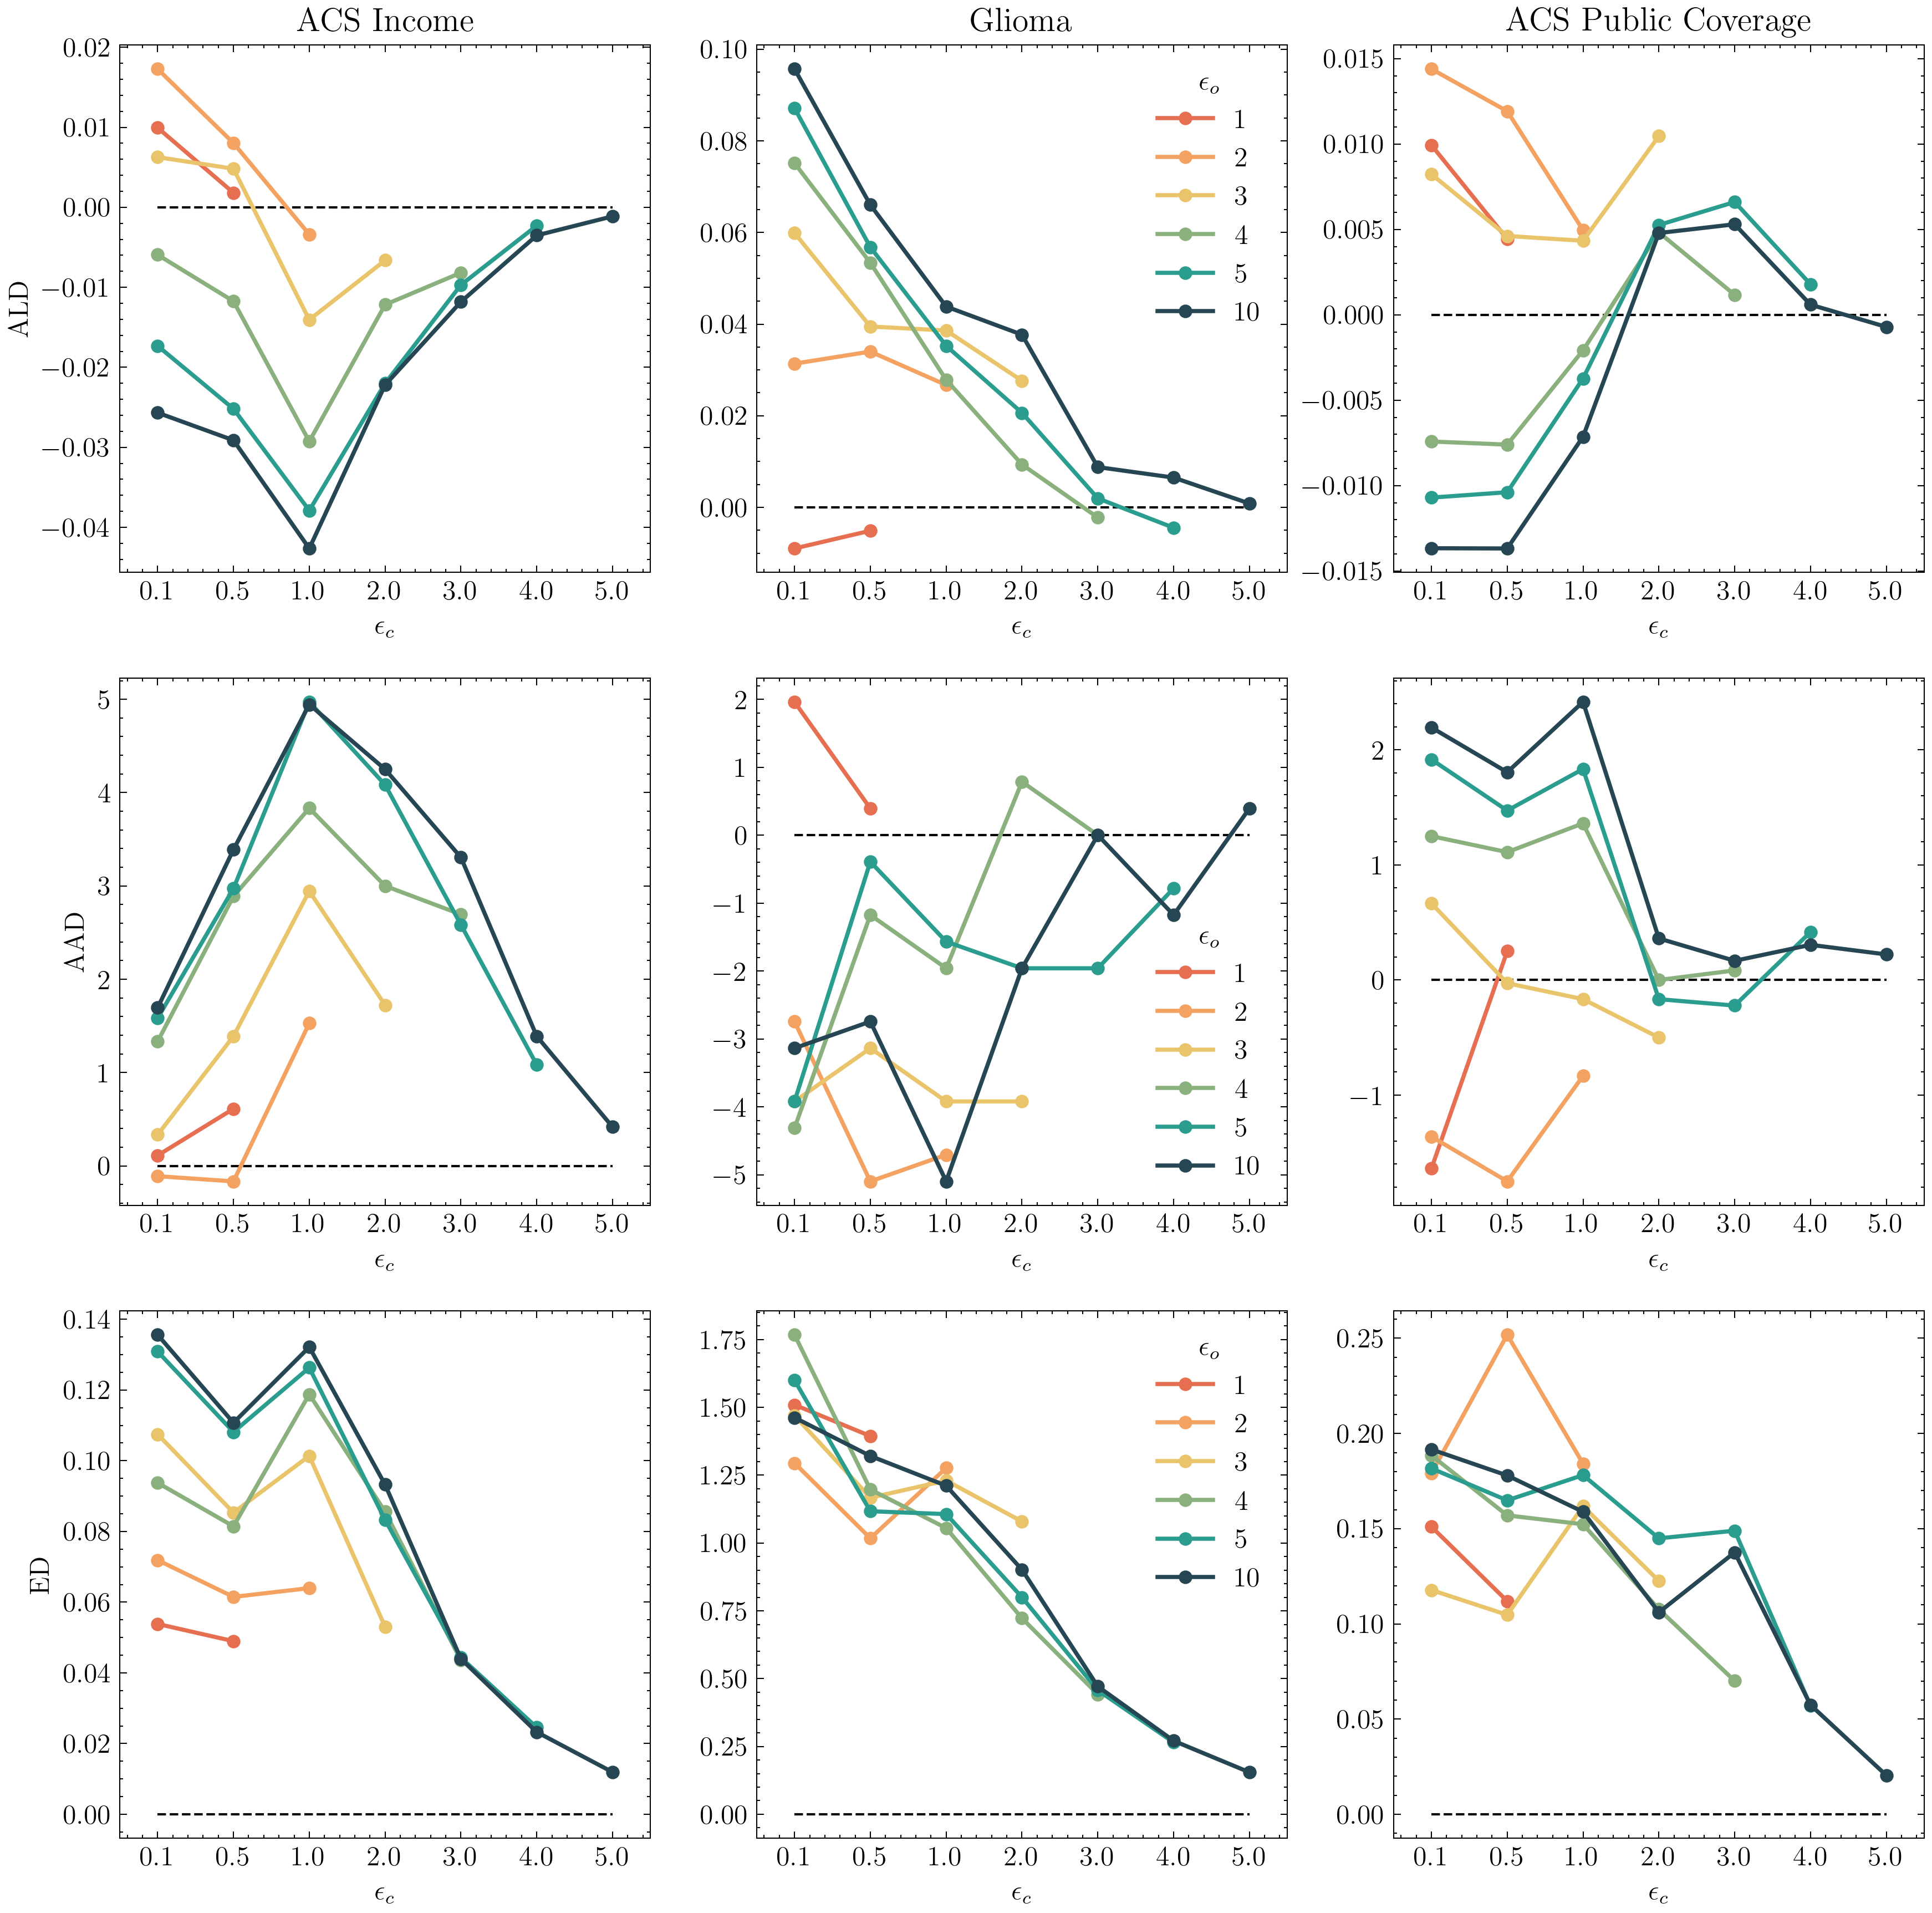

In [24]:

palette =  ["#e76f51", "#f4a261", "#e9c46a", "#8ab17d", "#2a9d8f","#264653"]

d_ = ['adult', 'glioma', 'pubcov']
# dfs = [adult_to_plot, glioma_to_plot, pubcov_to_plot]

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(14, 14), squeeze=True)

axs = [[ax1, ax4, ax7], [ax2, ax5, ax8], [ax3, ax6, ax9]]
legs = [False, 'full', False, False, 'full', False, False, 'full', False]

to_do = ["ALD", "AAD", "ED"]

for i, d in enumerate(d_):
      df = q1[d]
      df_ = {"ALD": np.concatenate([df[i]["Influence Estimated - Retrain Loss"] for i in range(len(df))]),
             "AAD": np.concatenate([df[i]["Influence Estimated - Retrain Accuracy"] for i in range(len(df))]),
             "ED": np.concatenate([df[i]["ED"] for i in range(len(df))]),
            "$\epsilon_c$": np.concatenate([df[i]["$\epsilon$"] for i in range(len(df))]),
            "$\epsilon_o$": [10, 10, 10, 10, 10, 10, 10, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 1, 1]}

      for j in range(3):
            sns.lineplot(x=[0,6], y =[0,0], linestyle='--', color='black', ax=axs[i][j])
            sns.pointplot(x="$\epsilon_c$",y=to_do[j], data=df_, hue="$\epsilon_o$", palette=sns.color_palette(palette, len(palette)), ax=axs[i][j], legend=legs[i])

      # plt.legend(title="$\epsilon_o$")

ax1.set_title("ACS Income")
ax2.set_title("Glioma")
ax3.set_title("ACS Public Coverage")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax5.set_ylabel("")
ax6.set_ylabel("")
ax8.set_ylabel("")
ax9.set_ylabel("")

# for i, df in enumerate(all_to_plot):
#       d = df["Actual - Influence Estimated Loss"]
#       x = df["$\epsilon$"]
#       err = df["std"]
#       ax.fill_between(x, d - err, d + err, alpha=0.2)


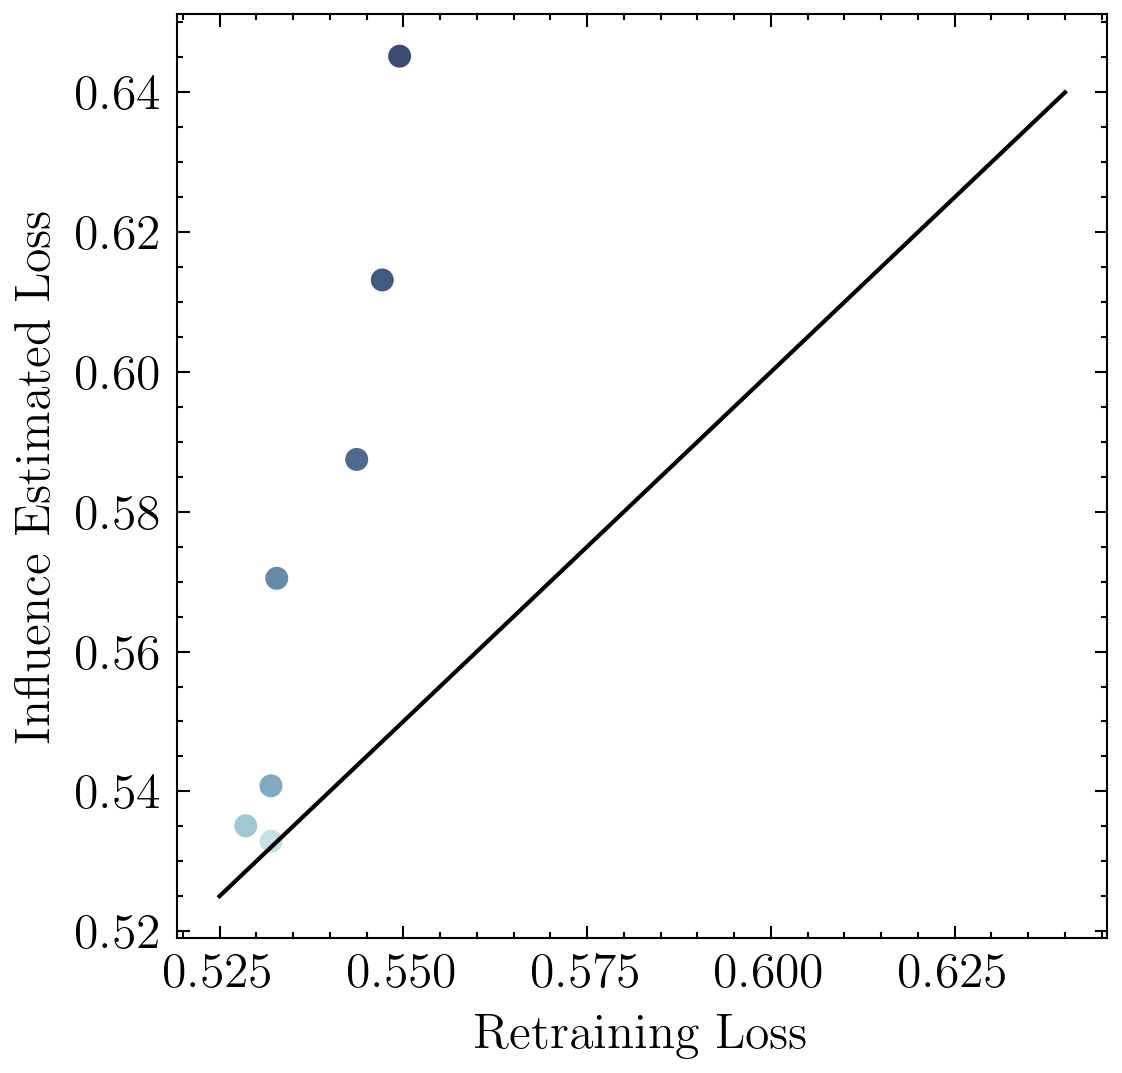

In [122]:
# df = {'Retrain - Influence Estimated Loss': np.array(to_plot_change),
#           'std': np.array(to_plot_std),
#           'Retraining Loss': np.mean(retrain_losses),
#           'Influence Estimated Loss': np.mean(influence_losses),
#         #   'Influence Estimated Loss': to_plot_inf,
#         '$\epsilon$': epsilons}

df = all_to_plot[0]
f, ax = plt.subplots(figsize=(4, 4))
# sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Retraining Loss", y="Influence Estimated Loss",
                hue="$\epsilon$",
                palette="ch:r=-.2,d=.3_r",
                data=df, ax=ax, legend=False)

# z = np.polyfit(df['Original - Actual Loss'], df['Influence'], 1)
# xx = np.linspace(min(df['Original - Actual Loss'])-0.0005, max(df['Original - Actual Loss'])+0.0005)
# yy = np.polyval(z, xx)
xx = [.525, .64]
ax.plot(xx, xx, ls="-", color='k')

In [296]:
def test_inference(model, testloaders): #, test_loaders):
    """
    Returns the test accuracy loss, and uncertainty values
    """
    model.eval()
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    # criterion = nn.BCEWithLogitsLoss().to(device)
    criterion = nn.CrossEntropyLoss()
 
    all_loss, all_accs = [], []

    for t in testloaders:
        loss, total, correct = 0.0, 0.0, 0.0
       
        for _, (images, labels) in enumerate(t):
            images, labels = images.to(device), labels.to(device)

            # inference
            outputs = model(images.to(torch.float32))
            
            batch_loss =criterion(torch.atleast_2d(outputs), labels.to(torch.int64))
            loss += batch_loss.item()

            # prediction
            _, pred_labels = torch.max(torch.nn.functional.softmax(outputs, dim=1), 1)
            pred_labels = pred_labels.view(-1)
            correct += torch.sum(torch.eq(pred_labels, labels)).item()
            total += len(labels)

        all_accs.append(correct/total)
        all_loss.append(loss/len(t))

    return all_loss, all_accs

In [297]:
class MLP(nn.Module):
    def __init__(self, dim_in):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(dim_in, 2, bias=False)

    def forward(self, x):
        x = self.fc1(x)
        return x

In [342]:
class Client(object):
    def __init__(self, train_loader, test_loader):
        # self.args = args
        self.trainloader, self.testloader = train_loader, test_loader
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.criterion = nn.CrossEntropyLoss().to(self.device)
        # self.criterion = nn.BCEWithLogitsLoss().to(self.device)
    def update_weights(self, model, lr):
        # set mode to train model
        model.train()
        model.to(self.device)

        # set optimizer for local updates - must be set each time bc we have diff parameters than we left off on
        optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.0, weight_decay=0)
        
        for iter in range(3):
            batch_loss = []

            batch_correct, batch_total = 0.0, 0.0
            for batch_idx, (images, labels) in enumerate(self.trainloader):
                images, labels = images.to(self.device), labels.to(self.device)
                
                optimizer.zero_grad()
                outputs = model(images.to(torch.float32))
                loss = self.criterion(torch.atleast_2d(outputs), labels.to(torch.int64))
                loss.backward()
                optimizer.step()

                # prediction
                _, pred_labels = torch.max(outputs, 1)
                pred_labels = pred_labels.view(-1)
                batch_correct += torch.sum(torch.eq(pred_labels, labels)).item()
                batch_total += len(labels)

                batch_loss.append(loss.item())

        return model.state_dict(), sum(batch_loss)/len(batch_loss), batch_correct/batch_total

In [328]:
def average_weights(w, amount_data):
    # print(len(w), len(amount_data))
    w_avg = deepcopy(w[0])

    weights = [a/sum(amount_data) for a in amount_data]

    for key in w_avg.keys():
        w_avg[key] = torch.zeros_like(w_avg[key])
        for i in range(len(w)):
            w_avg[key] += w[i][key]*weights[i]
    return w_avg, weights

In [300]:

def GRR_Client(input_data, possible, p):
    if np.random.binomial(1, p) == 1:
        return int(input_data)

    else:
        possible.remove(input_data)
        return np.random.choice(possible)
    
class PandasDataset(Dataset):
    def __init__(self, dataframe, which_dataset):
        self.dataframe = dataframe

    def __getitem__(self, index):
        row = self.dataframe.iloc[index].to_numpy()
        features = row[:-1]
        label = row[-1]
        return features, label

    def __len__(self):
        return len(self.dataframe)

In [386]:
with open(f'/home/ancarey/influence/final_data/pubcov/pubcov_data_1.0_0.pkl', 'rb') as f:  
    all_data = pickle.load(f)

train_loaders, test_loaders, trainloader, testloader, shape, full_adult_train, full_adult_test, train_df, test_df, train_df_rr, possible, train_pandas_torch =  all_data

print(train_df_rr[0])

     AGEP  SCHL  MAR  SEX  DIS  CIT  MIL  NATIVITY  PINCP  ESR  RAC1P  PUBCOV
0       1    15    4    1    1    4    4         1     17    3      0       1
1       0    14    0    1    1    0    4         0     16    6      0       1
2       0    19    0    1    1    0    2         0     23    1      1       0
3       2    18    0    1    1    3    4         1     22    1      5       1
4       1     8    2    1    0    2    4         0     17    6      0       0
..    ...   ...  ...  ...  ...  ...  ...       ...    ...  ...    ...     ...
955     3    14    0    0    1    3    4         1     16    1      0       1
956     4    19    4    0    1    0    4         0     28    1      0       1
957     2    15    2    1    0    0    4         0     14    6      0       1
958     3    15    2    1    0    0    4         0     14    6      0       1
959     4    19    0    1    1    0    4         0     18    1      0       1

[960 rows x 12 columns]


In [358]:
df = {'Additional Epochs': [],
      'Original Estimation': [],
      'Actual Change': [],
      'Epoch': [],
      '$\epsilon$':[]}

dataset = "glioma"

if dataset == 'glioma':
   lr = 0.001
   do_again = 10
elif dataset == 'adult':
    lr = 0.0001    
    do_again = 10
elif dataset == 'pubcov':
    lr = 0.00001
    do_again = 10


epsilons=[.5, 1]
eo = 10

for e in epsilons:
    with open(f'/home/ancarey/influence/final_results/{dataset}/{dataset}_data_{eo}.0_results.pkl', 'rb') as f:  
        all_data = pickle.load(f)

    # args = arg_parser()

    p_loss, p_acc, p_param, p_inf = {i:[] for i in all_data['change_accs'].keys()}, {i:[] for i in all_data['change_accs'].keys()}, {i:[] for i in all_data['change_accs'].keys()}, {i:[] for i in all_data['change_accs'].keys()}
    for i in range(3):
        for k in all_data['pert_losses'][i].keys():
            p_loss[k].append(all_data['pert_losses'][i][k][0])
            p_acc[k].append(all_data['pert_accs'][i][k][0])
            p_inf[k].append(all_data['pert_inf'][i][k])
            p_param[k].append(all_data['pert_params'][i][k])

    all_ep, all_tl, all_ta, all_ca, all_oe, all_eps = [], [], [], [], [], []

    for i in range(3):
        if i ==0:
            if dataset == 'pubcov':
                seed = 321 #1 for adult and glioma
            else:
                seed = 1
        elif i == 1:
            seed = 123
        else:
            seed = 42
        print(f'\n{i+1}')
        with open(f'/home/ancarey/influence/final_data/{dataset}/{dataset}_data_{eo}.0_{i}.pkl', 'rb') as f:  
            loaded_data = pickle.load(f)

        train_loaders, test_loaders, trainloader, testloader, shape, full_adult_train, full_adult_test, train_df, test_df, train_df_rr, possible, train_pandas_torch =  loaded_data

        global_model = MLP(dim_in=len(all_data['change_params'][e][i][0]))

        sd2 = global_model.state_dict()
        sd2['fc1.weight'] = torch.from_numpy(p_param[e][i])
        pert_model = deepcopy(global_model)
        pert_model.load_state_dict(sd2)

        amount_data = []

        for t in train_loaders:
            amount_data.append(len(t.dataset))
        weights = [a/sum(amount_data) for a in amount_data]
     
        # do one round of training with updated clients
        ep, tl, ta, ca, oe, eps = [], [], [], [], [], []
        
        for j in range(do_again):
            local_weights = []
            for idx in range(5):
                if idx == 0 and j == 0:
                    print('doing change')
                    adult_train_df = train_df[i]
                    p = np.exp(e) / (np.exp(e) + 1)
                    if dataset == 'adult':
                        sensitive_columns = ['RAC1P', "PINCP", "SEX"]
                    elif dataset == 'glioma':
                        sensitive_columns = ['Age_at_diagnosis', "Race", "Grade"]
                    elif dataset == 'pubcov':
                        sensitive_columns =  ['AGEP', 'SEX', 'RAC1P', 'PUBCOV']

                    rr_adult_train = []
                    for col in adult_train_df.columns:
                        if col in sensitive_columns:
                            col_val_list = adult_train_df[col].tolist()
                            df_new_col = pd.DataFrame([int(GRR_Client(val, deepcopy(possible[col]), p)) for val in col_val_list], columns=[col])
                            rr_adult_train.append(df_new_col)
                        else:
                            col_val_list = adult_train_df[col].tolist()
                            rr_adult_train.append(pd.DataFrame([int(val) for val in col_val_list], columns=[col]))
                    
                    adult_train_df_rr = pd.concat(rr_adult_train, axis=1)
                    train_df_rr[idx] = adult_train_df_rr

                    if dataset == 'adult':
                        adult_train = PandasDataset(train_df_rr[idx], 'adult')
                    elif dataset == 'glioma':
                        adult_train = PandasDataset(train_df_rr[idx], 'glioma')
                    elif dataset == 'pubcov':
                        adult_train = PandasDataset(train_df_rr[idx], 'pubcov')

                    ctrainloader = DataLoader(adult_train, batch_size=1, shuffle=True)
                    train_loaders[idx] = ctrainloader


                local_model = Client(train_loader=train_loaders[idx], test_loader=test_loaders[idx])
                w, _, _ = local_model.update_weights(model=copy.deepcopy(pert_model), lr=lr)
                
                local_weights.append(copy.deepcopy(w))
                        
            pert_weights, _ = average_weights(local_weights, weights)
         
            pert_model.load_state_dict(pert_weights)

            test_loss_pert, test_acc_pert = test_inference(pert_model, [testloader])

            print('\nEpoch', j+1)
            print('test loss', test_loss_pert)
            print('test acc', test_acc_pert[0]*100)
            print('change acc', all_data['change_accs'][e][i])
            print('original estimation acc', p_acc[e][i]*100)

            ep.append(j+1)
            tl.append(test_loss_pert)
            ta.append(test_acc_pert[0]*100)
            ca.append(all_data['change_accs'][e][i])
            oe.append(p_acc[e][i]*100)
            eps.append(e)
        
        all_ep.append(ep)
        all_tl.append(tl)
        all_ta.append(ta)
        all_ca.append(ca)
        all_oe.append(oe)
        all_eps.append(eps)

    df['Additional Epochs'].append(np.mean(all_ta, axis=0))
    df['Original Estimation'].append(np.mean(all_oe, axis=0))
    df['Actual Change'].append(np.mean(all_ca, axis=0))
    df['Epoch'].append(all_ep[0])
    df['$\epsilon$'].append(all_eps[0])
    
print(df)






1
doing change

Epoch 1
test loss [0.5734081885393928]
test acc 75.29411764705883
change acc 75.2941
original estimation acc 75.29411764705883

Epoch 2
test loss [0.5692788790254032]
test acc 75.29411764705883
change acc 75.2941
original estimation acc 75.29411764705883

Epoch 3
test loss [0.5654050641200121]
test acc 75.29411764705883
change acc 75.2941
original estimation acc 75.29411764705883

Epoch 4
test loss [0.561770626376657]
test acc 76.47058823529412
change acc 75.2941
original estimation acc 75.29411764705883

Epoch 5
test loss [0.5583463831859476]
test acc 76.47058823529412
change acc 75.2941
original estimation acc 75.29411764705883

Epoch 6
test loss [0.5551180297837538]
test acc 76.47058823529412
change acc 75.2941
original estimation acc 75.29411764705883

Epoch 7
test loss [0.5520729540025486]
test acc 77.64705882352942
change acc 75.2941
original estimation acc 75.29411764705883

Epoch 8
test loss [0.5491926882196875]
test acc 77.64705882352942
change acc 75.2941
ori

{'Additional Epochs': array([72.15686275, 72.15686275, 72.15686275, 72.94117647, 73.33333333,
       73.33333333, 74.11764706, 74.50980392, 74.90196078, 75.29411765,
       74.11764706, 74.11764706, 74.50980392, 74.90196078, 75.68627451,
       75.68627451, 75.68627451, 75.68627451, 75.68627451, 75.68627451]), 'Original Estimation': array([72.15686275, 72.15686275, 72.15686275, 72.15686275, 72.15686275,
       72.15686275, 72.15686275, 72.15686275, 72.15686275, 72.15686275,
       74.11764706, 74.11764706, 74.11764706, 74.11764706, 74.11764706,
       74.11764706, 74.11764706, 74.11764706, 74.11764706, 74.11764706]), 'Retraining': array([76.86273333, 76.86273333, 76.86273333, 76.86273333, 76.86273333,
       76.86273333, 76.86273333, 76.86273333, 76.86273333, 76.86273333,
       76.86276667, 76.86276667, 76.86276667, 76.86276667, 76.86276667,
       76.86276667, 76.86276667, 76.86276667, 76.86276667, 76.86276667]), 'Epoch': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,

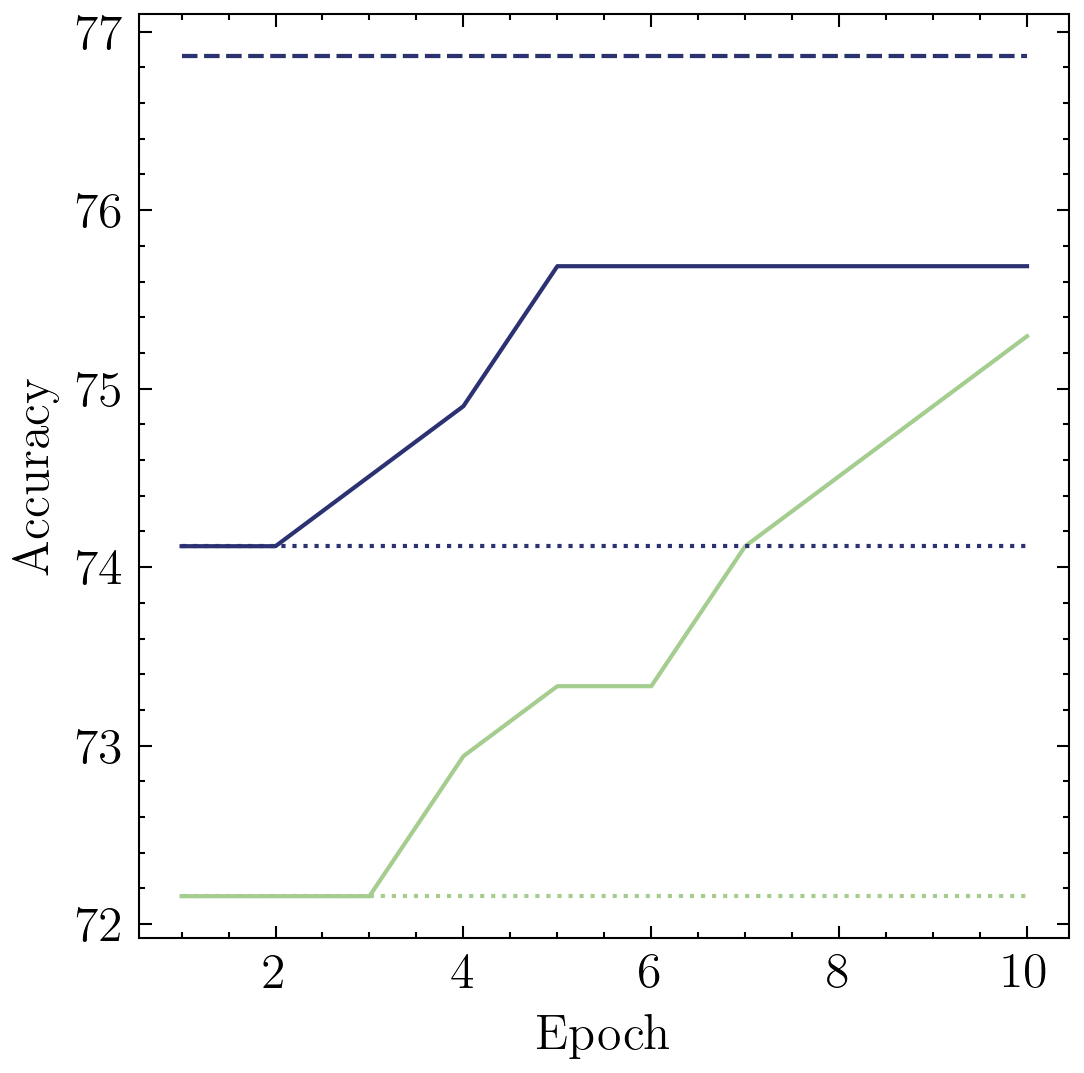

In [360]:
# df2 = {'Additional Epochs': df['Additional Epochs'][1], #np.concatenate(df['Additional Epochs']),
#       'Original Estimation': df['Original Estimation'][1], #np.concatenate(df['Original Estimation']),
#       'Retraining':df['Actual Change'][1], #np.concatenate(df['Actual Change']),
#       'Epoch': df['Epoch'][1], #np.concatenate(df['Epoch']),
#       '$\epsilon$': df['$\epsilon$'][1], #np.concatenate(df['$\epsilon$'])
#       }

df2 = {'Additional Epochs': np.concatenate(df['Additional Epochs']),
      'Original Estimation': np.concatenate(df['Original Estimation']),
      'Retraining':np.concatenate(df['Actual Change']),
      'Epoch': np.concatenate(df['Epoch']),
      '$\epsilon$': np.concatenate(df['$\epsilon$'])
      }

print(df2)

f, ax = plt.subplots(figsize=(4, 4))
# sns.set_palette("tab10")
# sns.despine(f, left=True, bottom=True)
# p = ["ch:r=-.2,d=.3_r", "ch:s=-.2,r=.6,d=.3_r",  "ch:s=2,r=.1,d=.3_r", "ch:s=3,r=.1,d=.3_r","ch:s=4,r=.1,d=.3_r"]
# color = ["blue", "red", "green"]
# for i, df in enumerate(all_to_plot):
sns.lineplot(x="Epoch",y="Additional Epochs", data=df2, hue="$\epsilon$", palette='crest', linestyle='solid')
sns.lineplot(x="Epoch",y="Original Estimation", data=df2, hue="$\epsilon$", palette='crest', linestyle='dotted')
sns.lineplot(x="Epoch",y="Retraining", data=df2, hue="$\epsilon$", palette='crest', linestyle='dashed')

ax.set(ylabel='Accuracy')

plt.legend([],[])
# plt.xticks(rotation=30)

In [15]:
#unbalanced
# df_10 = {'Actual Loss': [0.681, 0.669, 0.658, 0.649, 0.645,0.644, 0.645, 0.645, 0.645, 0.645, 0.645],
#       'Estimated Loss':[0.686, 0.681, 0.673, 0.657, 0.648, 0.646, 0.645, 0.645, 0.645, 0.645, 0.645],
#       'Estimated - Actual Loss': np.array([0.686, 0.681, 0.673, 0.657, 0.648, 0.646, 0.645, 0.645, 0.645, 0.645, 0.645])-np.array([0.681, 0.669, 0.658, 0.649, 0.645,0.644, 0.645, 0.645, 0.645, 0.645, 0.645]), 
#       '$\epsilon$': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#      }

# df_5 = {'Actual Loss': [0.681,0.668,0.658,0.649,0.645,0.645],
#       'Estimated Loss':[0.686,0.681,0.673,0.657,0.649,0.646],
#       'Estimated - Actual Loss': np.array([0.686,0.681,0.673,0.657,0.649,0.646]) - np.array([0.681,0.668,0.658,0.649,0.645,0.645]),
#       '$\epsilon$': [0.1, 0.5, 1, 2, 3, 4],
#      }

# df_1 = {'Actual Loss': [0.692,0.691,0.687,0.674],
#       'Estimated Loss':[0.69,0.69,0.687,0.687],
        
#       '$\epsilon$': [0.001, 0.01, .1, .5],
#      }

# balanced
df_10 = {'Actual Loss': [0.666, 0.662, 0.661, 0.659, 0.657, 0.657, 0.657, 0.657, 0.657, 0.657, 0.657],
      'Estimated Loss':[0.668, 0.667, 0.665, 0.661, 0.658, 0.657, 0.656, 0.656, 0.656, 0.656, 0.656],
      'Original Loss': [0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624],
      'Estimated - Actual Loss': np.array([0.668, 0.667, 0.665, 0.661, 0.658, 0.657, 0.656, 0.656, 0.656, 0.656, 0.656])-np.array([0.666, 0.662, 0.661, 0.659, 0.657, 0.657, 0.657, 0.657, 0.657, 0.657, 0.657]), 
      'Original - Actual Loss':  np.array([0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624, 0.656624])-np.array([0.666, 0.662, 0.661, 0.659, 0.657, 0.657, 0.657, 0.657, 0.657, 0.657, 0.657]),
      'Influence': [0.0149,0.0144,0.0134,0.0109,0.0089,0.0079,0.0074,0.0072,0.0072,0.0071,0.0071], 
      '$\epsilon$': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9]
     }

df_5 = {'Actual Loss': [0.681,0.668,0.658,0.649,0.645,0.645],
      'Estimated Loss':[0.686,0.681,0.673,0.657,0.649,0.646],
      'Estimated - Actual Loss': np.array([0.686,0.681,0.673,0.657,0.649,0.646]) - np.array([0.681,0.668,0.658,0.649,0.645,0.645]),
      '$\epsilon$': [0.1, 0.5, 1, 2, 3, 4],
     }

df_1 = {'Actual Loss': [0.692,0.691,0.687,0.674],
      'Estimated Loss':[0.69,0.69,0.687,0.687],
        
      '$\epsilon$': [0.001, 0.01, .1, .5],
     }

In [19]:
df = df_10
print(np.array(df['Actual Loss']) - np.array(df['Estimated Loss']))

[-0.002 -0.005 -0.004 -0.002 -0.001  0.     0.001  0.001  0.001  0.001
  0.001]


<Axes: xlabel='$\\epsilon$', ylabel='Original - Actual Loss'>

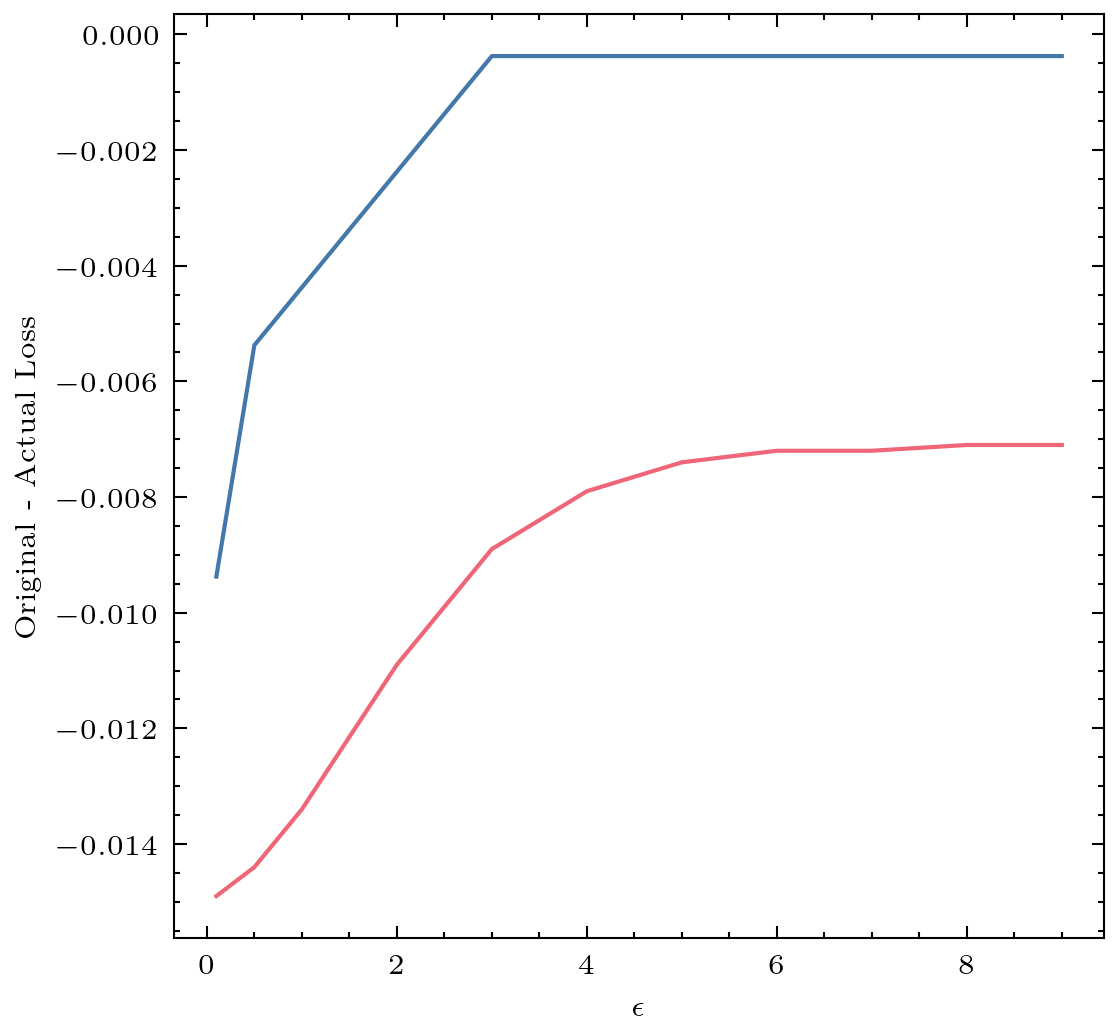

In [13]:

f, ax = plt.subplots(figsize=(4, 4))
sns.lineplot(x="$\epsilon$", y="Original - Actual Loss", data=df_10, ax=ax)
sns.lineplot(x="$\epsilon$", y='Influence', data=df_10, ax=ax)

# sns.lineplot(x="$\epsilon$", y="Estimated - Actual Loss", data=df_5, ax=ax)

# sns.lineplot(x="$\epsilon$", y="Estimated - Actual Loss", data=df_1, ax=ax)



MAE = 0.00409
P = 0.78


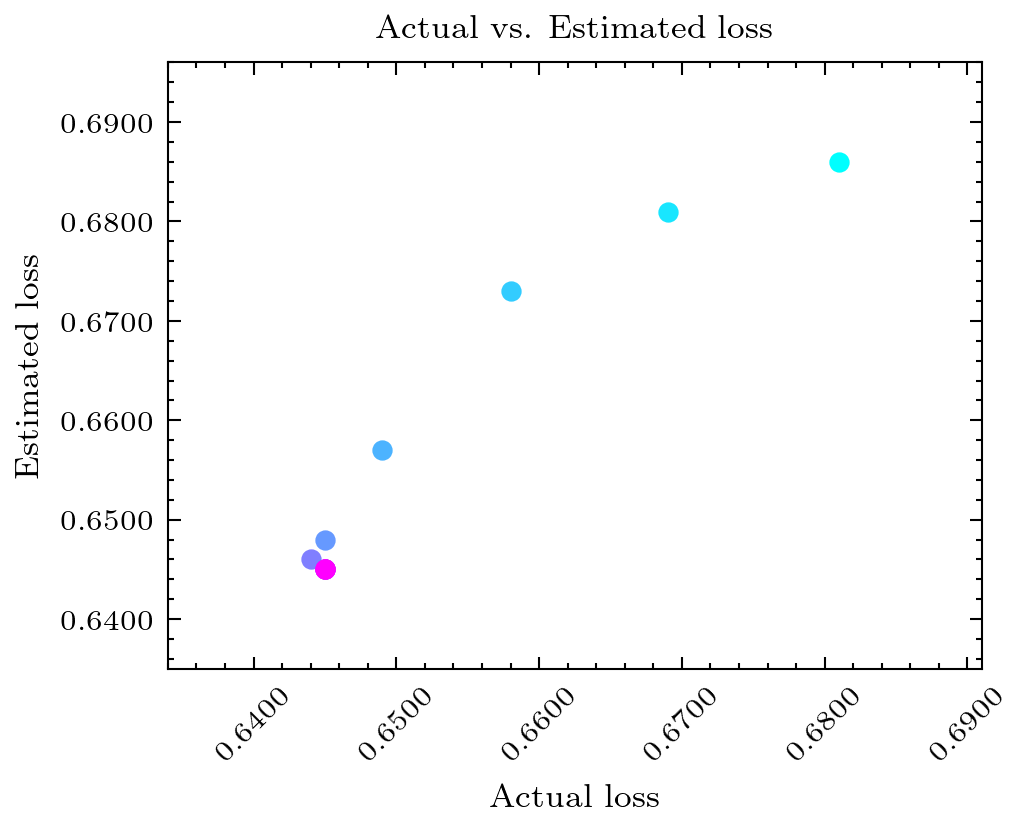

In [34]:
k_ = np.linspace(75, 75, 1) 

plt.rcParams['figure.dpi'] = 300
plt.style.use(['science'])
colors = cm.cool(np.linspace(0, 1, len(actual)))
fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

min_x = np.min(actual)
max_x = np.max(actual)
min_y = np.min(estimated)
max_y = np.max(estimated)

z = np.polyfit(actual,  estimated, 1)
p = np.poly1d(z)
print(p)
xx = np.linspace(p(2)/p(1), max(actual)+.01)
yy = np.polyval(p, xx)

ax.plot(xx, yy, ls="-", color='k')

for k in range(len(actual)):
    ax.scatter(actual, estimated[k], zorder=2, s=15, color=colors[k])

ax.set_title(f'Actual vs. Estimated loss', fontsize=8)
ax.set_xlabel('Actual loss' , fontsize=8)
ax.set_ylabel('Estimated loss', fontsize=8)

ax.set_xlim(min_x-.01, max_x+.01)
ax.set_ylim(min_y-.01, max_y+.01)

text = 'MAE = {:.03}\nP = {:.03}'.format(mean_absolute_error(actual, estimated), spearmanr(actual, estimated).correlation)
print(text)
plt.xticks(rotation = 45, fontsize=7, visible=True)
plt.yticks(fontsize=7)

plt.show()

In [6]:
normal_100 = [-0.0469, 0.3537, 0.01, 0.3729, 0.0029 ,0.1119 ,-0.1687, 0.2599, 0.2235]
normal = ['normal'] * len(normal_100)

# epsilon 10
# actual_point1 = [[-0.0247, 0.3289, 0.0062, 0.3447, -0.008, 0.1095, -0.1428, 0.2321, 0.1992], [0.035, 0.2375, -0.0219, 0.2078, -0.0199, 0.1185, -0.0665, 0.2206, 0.1439]]
# actual_point5 = [[-0.0293,0.3356,0.0088, 0.3597, -0.0034, 0.1096, -0.1526, 0.231, 0.207], [0.0396, 0.2308,-0.0245,0.1928, -0.0245, 0.1184, -0.0568, 0.2217, 0.1361]]
# actual_1 = [[-0.0355, 0.3464, 0.0063, 0.3665, -0.0107, 0.1133, -0.1534, 0.256, 0.1998], [0.0458, 0.22, -0.022, 0.186, -0.0172, 0.1147, -0.056, 0.1967, 0.1433]]
# actual_2 = [[-0.0385, 0.3512,0.0075,0.3704,-0.0042,0.1092,-0.1641,0.2475,0.2248], [0.0488,0.2152,-0.0232,0.1821,-0.0237,0.1187,-0.0453,0.2053,0.1183]]
# actual_3 = [[-0.0446,0.3522,0.0098,0.3751,0.0032,0.1105,-0.1675,0.255,0.2248],[0.0549,0.2142,-0.0256,0.1773,-0.0311,0.1175,-0.0419,0.1978,0.1183]]
# actual_4 = [[-0.0471,0.3527,0.0096,0.3736,0.0013,0.112,-0.1682,0.2574,0.2249],[0.0574,0.2137,-0.0253,0.1789,-0.0292,0.116,-0.0412,0.1953,0.1182]]
# actual_5 = [[-0.0465, 0.3518, 0.01,0.3719, 0.0019, 0.1119, -0.1673, 0.2585,0.2219],[0.0568, 0.2146, -0.0258, 0.1806, -0.0298, 0.1161, -0.042, 0.1942, 0.1212]]
# actual_6 = [[-0.0469,0.3531,0.01,0.3729,0.0029,0.1117,-0.1681,0.2593,0.2235],[0.0572,0.2133,-0.0257,0.1796,	-0.0307,	0.1163,	-0.0412,	0.1935,	0.1196]]
# actual_7 = [[-0.0469,0.3537,	0.01,	0.3729,	0.0029,	0.1119,	-0.1688,	0.2598,	0.2238],[0.0572,	0.2127,	-0.0257,	0.1796,	-0.0308,	0.1161,	-0.0406	,0.1929	,0.1193]]
# actual_8 = [[-0.0469,0.3537	,0.01	,0.3729,	0.0029,	0.1119,	-0.1687,	0.2597,	0.2235],[0.0572,	0.2127,	-0.0257,	0.1795,	-0.0308,	0.1161,	-0.0406,	0.193,	0.1196]]
# actual_9 = [[-0.0469,	0.3537,	0.01,	0.3729	,0.0029	,0.1119,	-0.1687	,0.2599,	0.2235],[0.0572,	0.2127,	-0.0257,	0.1795,	-0.0307	,0.1161,	-0.0406	,0.1928,	0.1196]]

# epsilon 5
# actual_point1 = [[-0.0231	,0.3292	,0.0059,	0.3462,	-0.0079,	0.1087,	-0.1426,	0.231	,0.1977],[0.0334	,0.2372,	-0.0216	,0.2063	,-0.0199,	0.1193	,-0.0667,	0.2217	,0.1454]]
# actual_point5 = [[-0.0276	,0.3358,	0.0085,	0.3612,	-0.0034	,0.1088,	-0.1523	,0.2299	,0.2055],[0.0379	,0.2306,	-0.0242	,0.1913	,-0.0245	,0.1192,	-0.057,	0.2228,	0.1377]]
# actual_1 = [[-0.0337,	0.3466	,0.006,	0.368,	-0.0106	,0.1125,	-0.1532,	0.255,	0.1984],[0.044,	0.2198	,-0.0217,	0.1845	,-0.0173	,0.1155,	-0.0562	,0.1978	,0.1448]]
# actual_2 =[[-0.0367	,0.3514	,0.0072,	0.3718,	-0.0042	,0.1085	,-0.1637,	0.2464	,0.2231],[0.047,	0.215	,-0.0229,	0.1806,	-0.0237	,0.1195,	-0.0456	,0.2063	,0.12]]
# actual_3 = [[-0.0428,	0.3524,	0.0095,	0.3766	,0.0032,	0.1097	,-0.1671	,0.2538	,0.2231],[0.0531,	0.214,	-0.0252,	0.1759,	-0.0311	,0.1183	,-0.0422,	0.1989	,0.12]]
# actual_4 = [[-0.0452	,0.3528,	0.0093,	0.375,	0.0013,	0.1112	,-0.1678,	0.2563	,0.2232],[0.0555	,0.2136	,-0.025,	0.1774,	-0.0291	,0.1168	,-0.0415,	0.1964,	0.1199]]

# epsilon 1
actual_001 = [[-0.001	,0.2894	,-0.0057,	0.3319	,-0.0419,	0.1136	,-0.1148,	0.2171	,0.173],[0.0113,0.27700	,-0.01000,	0.22060	,0.01400	,0.11440,	-0.09460,	0.23560,	0.1701]]
actual_01 = [[0.0014,	0.2851,	-0.0048,	0.3309,	-0.0391,	0.115	,-0.1165,	0.221	,0.1742],[0.0089,	0.28130,	-0.01090,	0.22160,	0.01120,	0.11300,	-0.09280,	0.23170,	0.1689]]
actual_point1 = [[-0.0031,	0.2881,	-0.0041,	0.3285,	-0.0306,	0.1152,	-0.1179	,0.22	,0.1716],[0.0134,	0.27830,	-0.01160,	0.22400,	0.00270,	0.11280,	-0.09150,	0.23270,	0.1716]]
actual_point5 = [[-0.0062	,0.2935,	-0.0023	,0.3419	,-0.0266,	0.1152	,-0.1253	,0.2192,	0.1774],[0.0165	,0.27290,	-0.01340,0.21050,	-0.00130	,0.11280	,-0.08400,	0.23350	,0.1657]]
actual = ['actual'] * len(actual_1)

# epsilon 10
# influence_point1 = [[-0.0227, 0.3261, 0.0036, 0.3359, -0.0157, 0.1136, -0.1406, 0.2521, 0.1936], [0.033, 0.2403, -0.0193, 0.2166, -0.0122, 0.1144, -0.0688, 0.2007, 0.1495]]
# influence_point5 = [[-0.0245, 0.328, 0.004, 0.3386, -0.0142, 0.1135, -0.1426, 0.2529, 0.1957], [0.0348, 0.2384	, -0.0197, 0.2139, -0.0137, 0.1145, -0.0668, 0.1998, 0.1474]]
# influence_1 = [[-0.0276, 0.3315, 0.0048, 0.3435, -0.0115, 0.1133, -0.1463, 0.2544, 0.1996], [0.0379, 0.2349, -0.0205, 0.2089, -0.0164, 0.1147, -0.0631, 0.1983, 0.1435]]
# influence_2 = [[-0.0358	,0.3405	,0.0069,	0.3562,	-0.0045	,0.1128,	-0.1557,	0.2583,	0.2095],[0.0461,	0.2259	,-0.0226	,0.1963	,-0.0234,	0.1152,	-0.0537	,0.1944,	0.1336]]
# influence_3 = [[-0.0422,	0.3477,	0.0085,	0.3663,	0.0011,	0.1123,	-0.1631,	0.2614,	0.2174],[0.0525,	0.2187,	-0.0242,	0.1862,	-0.029	,0.1157	,-0.0462	,0.1913,	0.1258]]
# influence_4 = [[-0.0456,	0.3515,	0.0094,	0.3715	,0.0041	,0.1121,	-0.1671	,0.263,	0.2215],[0.0559	,0.2149,	-0.0251,	0.1809,	-0.0319,	0.1159,	-0.0423,	0.1897,	0.1216]]
# influence_5 = [[-0.0471, 0.3531	, 0.0097, 0.3738, 0.0053, 0.112, -0.1687, 0.2637, 0.2232], [0.0574, 0.2133, -0.0255, 0.1787, -0.0332, 0.116, -0.0406, 0.189, 0.1199]]
# influence_6 = [[-0.0476,	0.3537,	0.0099,	0.3747	,0.0058,	0.112,	-0.1694	,0.264	,0.2239],[0.0579	,0.2127	,-0.0256,	0.1778,	-0.0337	,0.116,	-0.04	,0.1888	,0.1192]]
# influence_7 = [[-0.0478,	0.3539,	0.0099,	0.375,	0.006,	0.112,	-0.1696,	0.2641	,0.2242],[0.0581,	0.2125	,-0.0256,	0.1775,	-0.0339	,0.116,	-0.0397,	0.1887,	0.1189]]
# influence_8 = [[-0.0479	,0.354	,0.01	,0.3751	,0.006	,0.112,	-0.1697,	0.2641,	0.2243],[0.0582	,0.2124	,-0.0257,	0.1774	,-0.0339,	0.116,	-0.0396	,0.1886,	0.1188]]
# influence_9 = [[-0.0479	,0.3541,	0.01,	0.3752,	0.0061,	0.112,	-0.1698	,0.2641,	0.2243],[0.0582	,0.2123,	-0.0257,	0.1773,	-0.034,	0.116,	-0.0396	,0.1886	,0.1188]]

# epsilon_5
# influence_point1 = [[-0.0214	,0.3248,	0.0034,	0.3366,	-0.016,	0.1131	,-0.1399,	0.2516	,0.1921],[0.0317	,0.2416	,-0.0191,	0.2159,-0.0119	,0.1149	,-0.0694,	0.2011	,0.151]]
# influence_point5 = [[-0.0231	,0.3266,	0.0038	,0.3393,	-0.0146,	0.113,	-0.1418	,0.2524	,0.1941],[0.0334,	0.2398,	-0.0195,	0.2132,	-0.0133,	0.115	,-0.0675,	0.2003	,0.149]]
# influence_1 = [[-0.0261	,0.33	,0.0046,	0.3442,	-0.012	,0.1128	,-0.1454,	0.2539	,0.1978],[0.0364,	0.2364,	-0.0203,	0.2082,	-0.0159,	0.1152	,-0.0639,0.1988,	0.1453]]
# influence_2 = [[-0.0338,	0.3388	,0.0067	,0.3569	,-0.0053,	0.1121	,-0.1546,	0.2578	,0.2072],[0.0442,	0.2276,	-0.0224	,0.1956	,-0.0226,	0.1158,	-0.0548,	0.1949	,0.136]]
# influence_3 = [[-0.04002,	0.34575,	0.00827,	0.36695	,0.00011,	0.11166	,-0.16187,	0.26086	,0.21466],[0.05033	,0.22066,	-0.02397,	0.18552	,-0.02800,	0.11634,	-0.04748	,0.19186,	0.12846]]
# influence_4 = [[-0.0433	,0.3494,	0.0091,	0.3722,	0.0029	,0.1114	,-0.1657,	0.2625,	0.2186],[0.0536	,0.217	,-0.0248,	0.1802	,-0.0308,	0.1166	,-0.0437,	0.1902	,0.1245]]

# epsilon 1
influence_001 = [[0.00020,	0.29400,	-0.00559,	0.31008	,-0.02483,	0.11557	,-0.11643,	0.22527	,0.17051],[0.01010,	0.27241,	-0.01012,	0.24239,	-0.00306,	0.11243	,-0.09292,	0.22745	,0.17260]]
influence_01 = [[0.00020	,0.29401,	-0.00559	,0.31011	,-0.02483	,0.11557,	-0.11644,	0.22528	,0.17052],[0.01011,	0.27239,	-0.01012,	0.24236	,-0.00306,	0.11243	,-0.09290,0.22744,	0.17260]]
influence_point1 = [[0.00011	,0.29412	,-0.00556	,0.31042	,-0.02481,	0.11558	,-0.11658	,0.22539,	0.17057],[0.01019,	0.27228	,-0.01014,	0.24205	,-0.00308,	0.11242,	-0.09277,	0.22733	,0.17255]]
influence_point5 = [[-0.0004	,0.2948,	-0.0054	,0.3123,	-0.0247,	0.1156	,-0.1174,	0.226	,0.1709],[0.0107,	0.2716,	-0.0103	,0.2402,	-0.0032,0.1124	,-0.092,	0.2267,	0.1722]]
influence = ['influence'] * len(influence_5)


# x = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# xnew = np.linspace(1, 9, 300) 
  
# gfg_1 = make_interp_spline(x, actual_100, k=3) 
# gfg_2 = make_interp_spline(x, influence_100_100, k=3) 
  
# y_new_1 = gfg_1(xnew) 
# y_new_2 = gfg_2(xnew)   

# epoch_10 = {'model': actual +influence_100 ,
#                 'labels': actual_100 + influence_100_100 ,
#                 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9] * 2
#                }

# asdf = {'model': y_new_1 + y_new_2,
#         'x': xnew*2}
# data_10 = pd.DataFrame(epoch_10)

# fig1 = sns.scatterplot(data_10, x='x', y="labels", hue='model')
# sns.lineplot(asdf, x='x', y='models')
print(np.linalg.norm(np.array(actual_001) - np.array(influence_001)))
print(np.linalg.norm(np.array(actual_01) - np.array(influence_01)))
print(np.linalg.norm(np.array(actual_point1) - np.array(influence_point1)))
print(np.linalg.norm(np.array(actual_point5) - np.array(influence_point5)))
# print(np.linalg.norm(np.array(actual_1) - np.array(influence_1)))
# print(np.linalg.norm(np.array(actual_2) - np.array(influence_2)))
# print(np.linalg.norm(np.array(actual_3) - np.array(influence_3)))
# print(np.linalg.norm(np.array(actual_4) - np.array(influence_4)))
# print(np.linalg.norm(np.array(actual_5) - np.array(influence_5)))
# print(np.linalg.norm(np.array(actual_6) - np.array(influence_6)))
# print(np.linalg.norm(np.array(actual_7) - np.array(influence_7)))
# print(np.linalg.norm(np.array(actual_8) - np.array(influence_8)))
# print(np.linalg.norm(np.array(actual_9) - np.array(influence_9)))

# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(np.array(actual_100)-np.array(influence_100_100), annot=True, fmt="f", linewidths=.5, ax=ax)



0.04168143711533946
0.03869698696281146
0.02967271642435185
0.04646568626416699


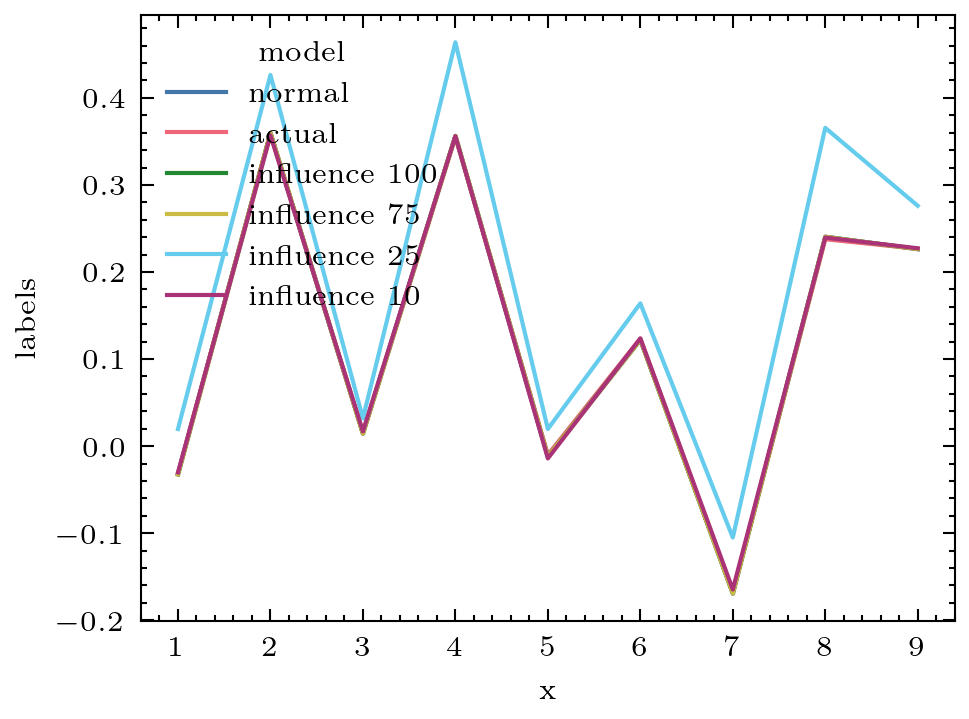

In [16]:
epoch_25 = {'model': normal + actual + influence_100 + influence_75 + influence_50 + influence_25 + influence_10,
                'labels': normal_25 + actual_25 + influence_100_25 + influence_75_25 + influence_50_25 + influence_25_25 + influence_10_25,
                'x': [1, 2, 3, 4, 5, 6, 7, 8, 9] * 7
               }

data_25 = pd.DataFrame(epoch_25)

fig2 = sns.lineplot(data_25, x='x', y="labels", hue='model')


In [ ]:
losses = [0.196, 0.299, 0.344, 0.485, 0.591]

term = [np.exp(t * l) for l in losses]


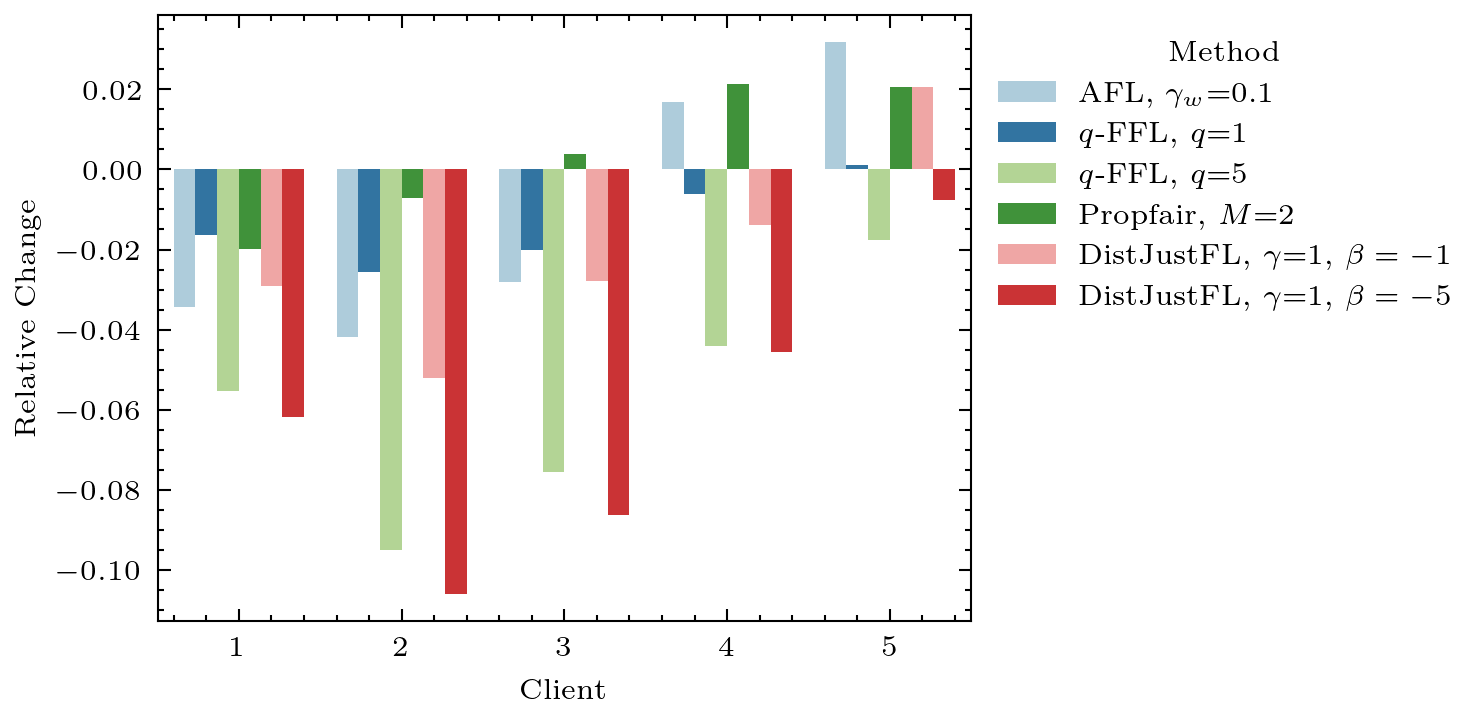

In [28]:
df = pd.read_csv('rel_change.csv')
df2 = pd.read_csv('abs_change.csv')

ax = sns.barplot(df, x="Client", y="Relative Change", hue="Method", palette='Paired')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='client', ylabel='abs_change'>

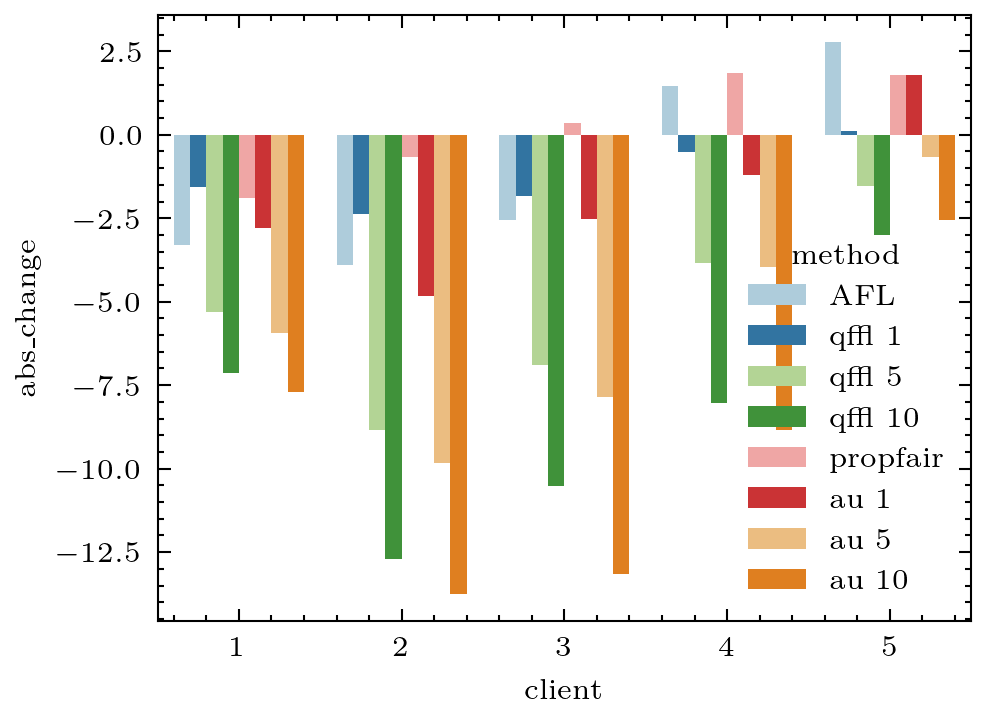

In [18]:
sns.barplot(df2, x="client", y="abs_change", hue="method", palette='Paired')


In [22]:
np.random.dirichlet([.5, .5, .5, .5, .5, .5, .5, .5, .5, .5], 5)

array([[1.88220050e-01, 1.14438667e-02, 7.60756309e-03, 9.28372490e-02,
        1.73388035e-01, 1.44429128e-01, 1.04798558e-02, 1.84333912e-02,
        2.01182309e-02, 3.33042630e-01],
       [3.73103098e-02, 1.92279205e-02, 2.19037833e-02, 4.44405439e-02,
        1.99921683e-02, 1.21321378e-01, 1.35701987e-02, 6.13777841e-02,
        4.45580350e-03, 6.56400110e-01],
       [1.32388502e-01, 1.55616420e-02, 2.46797226e-03, 2.21732881e-01,
        4.79826441e-02, 5.94672881e-02, 4.81934147e-03, 1.38796138e-02,
        1.90878553e-01, 3.10821563e-01],
       [1.20501714e-01, 3.59864320e-02, 2.85943560e-02, 1.31423458e-01,
        2.48075415e-01, 8.17503002e-03, 3.42532054e-01, 7.81740619e-02,
        5.25544051e-03, 1.28203850e-03],
       [1.38813782e-01, 1.65794675e-04, 6.13199969e-02, 2.20203301e-02,
        6.29048616e-02, 2.92984444e-01, 3.94303877e-02, 3.44110138e-01,
        2.08249338e-02, 1.74253304e-02]])

In [23]:
sum([8.96381728e-04, 3.08835886e-01, 6.18787228e-05, 1.44770909e-01,
        2.23762848e-01, 4.03863964e-02, 3.32727047e-02, 5.91935547e-04,
        1.09968697e-04, 2.47311092e-01])

1.0000000007947998

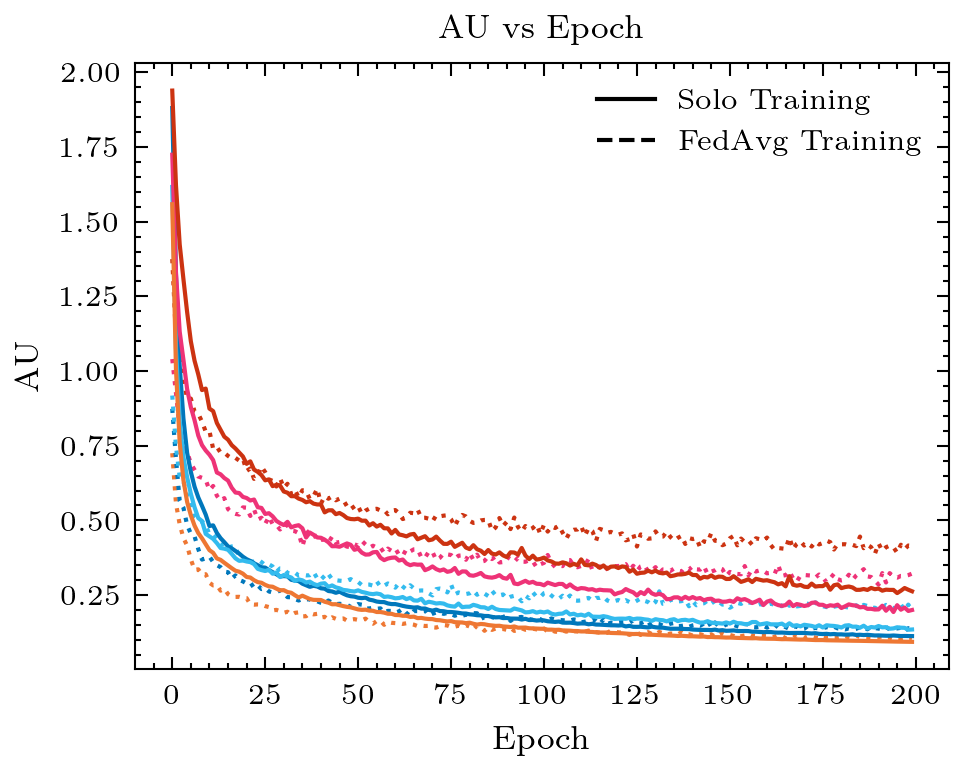

<Figure size 15000x3600 with 0 Axes>

In [20]:
df = pd.read_csv('new_code_distjust.csv')

c1_acc, c1_loss, c1_au  = df['tea1'], df['tl1'], df['au1']
c2_acc, c2_loss, c2_au  = df['tea2'], df['tl2'], df['au2']
c3_acc, c3_loss, c3_au  = df['tea3'], df['tl3'], df['au3']
c4_acc, c4_loss, c4_au  = df['tea4'], df['tl4'], df['au4']
c5_acc, c5_loss, c5_au  =df['tea5'], df['tl5'], df['au5']
g_acc, g_loss, g_au  = df['gac'], df['gtl'], df['gau']

au_0 = [1.5583469867706299, 1.0057369470596313, 0.7608440518379211, 0.6351016163825989, 0.5619435906410217, 0.5172234773635864, 0.48264145851135254, 0.45763763785362244, 0.44025173783302307, 0.42072755098342896, 0.40054601430892944, 0.3916819393634796, 0.37291938066482544, 0.36798837780952454, 0.3583970069885254, 0.34931379556655884, 0.34012237191200256, 0.3316713571548462, 0.3283482491970062, 0.32184284925460815, 0.31087952852249146, 0.30886220932006836, 0.29995888471603394, 0.2935395836830139, 0.2913408875465393, 0.2843729555606842, 0.2792527973651886, 0.27812689542770386, 0.27181410789489746, 0.2662128508090973, 0.2666597366333008, 0.26037606596946716, 0.2578504681587219, 0.24965910613536835, 0.24211065471172333, 0.24808155000209808, 0.24244695901870728, 0.23695260286331177, 0.23423556983470917, 0.23403044044971466, 0.2336111217737198, 0.22787420451641083, 0.22467173635959625, 0.21942538022994995, 0.2195783257484436, 0.21636883914470673, 0.21322669088840485, 0.21074485778808594, 0.20911473035812378, 0.20565049350261688, 0.2021723985671997, 0.20065949857234955, 0.2012523114681244, 0.19828374683856964, 0.19753143191337585, 0.19352257251739502, 0.1934966892004013, 0.19131633639335632, 0.18779470026493073, 0.18744303286075592, 0.18348011374473572, 0.18322066962718964, 0.18091626465320587, 0.18074718117713928, 0.17717792093753815, 0.1779089719057083, 0.17305590212345123, 0.17374660074710846, 0.17140638828277588, 0.17009206116199493, 0.16972963511943817, 0.1666300743818283, 0.165940523147583, 0.16359397768974304, 0.16196751594543457, 0.16310127079486847, 0.15949302911758423, 0.15896816551685333, 0.1584015190601349, 0.15627163648605347, 0.1577458679676056, 0.1540728360414505, 0.15137876570224762, 0.15346777439117432, 0.1525099128484726, 0.14985103905200958, 0.14847736060619354, 0.1470976322889328, 0.14749793708324432, 0.14513275027275085, 0.14435237646102905, 0.1431504637002945, 0.14515188336372375, 0.14103415608406067, 0.14135843515396118, 0.14138513803482056, 0.13914597034454346, 0.13849347829818726, 0.13810625672340393, 0.13749156892299652, 0.13738121092319489, 0.13437069952487946, 0.13445116579532623, 0.13362541794776917, 0.134079709649086, 0.13192029297351837, 0.13141880929470062, 0.13103961944580078, 0.12988406419754028, 0.12976855039596558, 0.1284540742635727, 0.12851250171661377, 0.1270751655101776, 0.12671203911304474, 0.12552174925804138, 0.1249106377363205, 0.12484543025493622, 0.12490776181221008, 0.12346304953098297, 0.1230200007557869, 0.12251739948987961, 0.12232742458581924, 0.12128041684627533, 0.12042410671710968, 0.11976664513349533, 0.12006749957799911, 0.11898825317621231, 0.11854365468025208, 0.11754076927900314, 0.1174311637878418, 0.116797536611557, 0.11636454612016678, 0.1156628429889679, 0.1153009682893753, 0.11527424305677414, 0.11422282457351685, 0.1133367195725441, 0.11390640586614609, 0.11309359222650528, 0.1123049184679985, 0.11225242912769318, 0.11151695251464844, 0.11113051325082779, 0.11153526604175568, 0.10962863266468048, 0.11000368744134903, 0.10927917808294296, 0.1091986894607544, 0.10855375975370407, 0.10798861086368561, 0.10815485566854477, 0.1074519082903862, 0.10690397024154663, 0.10648635029792786, 0.10607532411813736, 0.10578218102455139, 0.10554326325654984, 0.10584264248609543, 0.10477369278669357, 0.10433042794466019, 0.10414579510688782, 0.10403190553188324, 0.10382998734712601, 0.10304512828588486, 0.1025170236825943, 0.1026730164885521, 0.10232478380203247, 0.10177531093358994, 0.10127203911542892, 0.10122869908809662, 0.10133646428585052, 0.10077060014009476, 0.09997687488794327, 0.09965548664331436, 0.09976008534431458, 0.09958909451961517, 0.09894653409719467, 0.09882698208093643, 0.09902449697256088, 0.09836956858634949, 0.09812506288290024, 0.09783033281564713, 0.09768194705247879, 0.09738444536924362, 0.09736514836549759, 0.09706304967403412, 0.09676995873451233, 0.09623213112354279, 0.09604271501302719, 0.09585113078355789, 0.095748171210289, 0.09541766345500946, 0.09516611695289612, 0.09496989846229553, 0.09476276487112045, 0.09446156769990921, 0.09426751732826233, 0.09442487359046936, 0.09383367747068405, 0.09365930408239365]
au_1 = [1.8801522254943848, 1.32034432888031, 1.0173301696777344, 0.8414561748504639, 0.725665807723999, 0.6626081466674805, 0.6128957271575928, 0.5770396590232849, 0.5488423705101013, 0.5194239616394043, 0.4814416766166687, 0.48349529504776, 0.45812085270881653, 0.44053274393081665, 0.4272833466529846, 0.41320016980171204, 0.40642207860946655, 0.39797458052635193, 0.38914424180984497, 0.37860220670700073, 0.37029263377189636, 0.36431506276130676, 0.35662269592285156, 0.3501470386981964, 0.34316831827163696, 0.34206366539001465, 0.33381909132003784, 0.3269902765750885, 0.31994765996932983, 0.31256163120269775, 0.31367751955986023, 0.31280186772346497, 0.3012711703777313, 0.29874300956726074, 0.29693615436553955, 0.2883060574531555, 0.282941997051239, 0.2778198719024658, 0.28124091029167175, 0.2787892818450928, 0.27290889620780945, 0.2714831233024597, 0.2637719213962555, 0.2622430622577667, 0.25780633091926575, 0.261567085981369, 0.25489914417266846, 0.24940237402915955, 0.24628454446792603, 0.2449803501367569, 0.24123626947402954, 0.2400253415107727, 0.24153722822666168, 0.2348915934562683, 0.23252920806407928, 0.228491872549057, 0.22689636051654816, 0.22663366794586182, 0.22218963503837585, 0.22004489600658417, 0.22007019817829132, 0.21729035675525665, 0.21405695378780365, 0.21157190203666687, 0.21009832620620728, 0.20831230282783508, 0.209335595369339, 0.20487360656261444, 0.2051226794719696, 0.20071503520011902, 0.19810548424720764, 0.2013605237007141, 0.1967180371284485, 0.19610224664211273, 0.1936245709657669, 0.19345560669898987, 0.19233338534832, 0.19079069793224335, 0.18869857490062714, 0.18837204575538635, 0.1857682317495346, 0.1846759021282196, 0.18276698887348175, 0.18232445418834686, 0.18022198975086212, 0.18007782101631165, 0.1770753562450409, 0.17559397220611572, 0.17612683773040771, 0.17324617505073547, 0.17348721623420715, 0.1715756207704544, 0.1711978018283844, 0.1711653172969818, 0.16822804510593414, 0.17076607048511505, 0.16659817099571228, 0.1669328659772873, 0.1648671180009842, 0.16590535640716553, 0.16541089117527008, 0.1625317484140396, 0.1613139659166336, 0.16041234135627747, 0.16167041659355164, 0.1580885797739029, 0.1576562076807022, 0.15789055824279785, 0.15657733380794525, 0.15451081097126007, 0.15529650449752808, 0.15514793992042542, 0.15241074562072754, 0.15385966002941132, 0.1514855921268463, 0.15125082433223724, 0.1504724770784378, 0.149610236287117, 0.14905063807964325, 0.14894700050354004, 0.1483331322669983, 0.1491386443376541, 0.14529894292354584, 0.14715759456157684, 0.1439405232667923, 0.14379212260246277, 0.14415325224399567, 0.14285658299922943, 0.1419043093919754, 0.1445007622241974, 0.14244294166564941, 0.1411406397819519, 0.14112132787704468, 0.1391107738018036, 0.13750366866588593, 0.13763312995433807, 0.1375521719455719, 0.13687947392463684, 0.13673360645771027, 0.13630005717277527, 0.1347624510526657, 0.13421368598937988, 0.13362662494182587, 0.1335686594247818, 0.13349522650241852, 0.13292063772678375, 0.13461165130138397, 0.1316756010055542, 0.13280841708183289, 0.13060465455055237, 0.13100582361221313, 0.1319824755191803, 0.12998126447200775, 0.1297406703233719, 0.12994278967380524, 0.12968821823596954, 0.1276146024465561, 0.12757934629917145, 0.12693817913532257, 0.12595686316490173, 0.12647058069705963, 0.12642982602119446, 0.12489622086286545, 0.12448509782552719, 0.12472636252641678, 0.12415153533220291, 0.1232358068227768, 0.12346463650465012, 0.1234932616353035, 0.12332472950220108, 0.12335085868835449, 0.12253298610448837, 0.1217106431722641, 0.12255849689245224, 0.12041361629962921, 0.11980133503675461, 0.12046179920434952, 0.11902830004692078, 0.11987345665693283, 0.11863759905099869, 0.11867012083530426, 0.11769925802946091, 0.11793643981218338, 0.11888285726308823, 0.11661209166049957, 0.1173580065369606, 0.11639054864645004, 0.11716204881668091, 0.11590085923671722, 0.11496780812740326, 0.11518994718790054, 0.1146470159292221, 0.1141337901353836, 0.11400895565748215, 0.11490824818611145, 0.11390285938978195, 0.11304108053445816, 0.11330702900886536, 0.11312507838010788, 0.11284223198890686]
au_2 = [1.6160330772399902, 1.0744708776474, 0.8347576856613159, 0.7127657532691956, 0.6441518068313599, 0.5891613960266113, 0.5440319180488586, 0.5079472064971924, 0.4979892075061798, 0.45504602789878845, 0.4464220702648163, 0.43816274404525757, 0.42416128516197205, 0.40759795904159546, 0.40546005964279175, 0.4017285406589508, 0.3879656195640564, 0.3731398582458496, 0.36477819085121155, 0.3658241927623749, 0.36255156993865967, 0.3605147898197174, 0.3539476990699768, 0.33794814348220825, 0.3337211608886719, 0.33068686723709106, 0.33461934328079224, 0.32158228754997253, 0.32582226395606995, 0.3105280101299286, 0.31720486283302307, 0.3129514753818512, 0.309004008769989, 0.29743093252182007, 0.30257290601730347, 0.2996179759502411, 0.2922723591327667, 0.295195609331131, 0.287577360868454, 0.283054918050766, 0.28835004568099976, 0.28982073068618774, 0.27753081917762756, 0.28249943256378174, 0.2759056091308594, 0.2727358937263489, 0.26735058426856995, 0.2659915089607239, 0.26345178484916687, 0.2621515095233917, 0.26598936319351196, 0.2607414424419403, 0.2581422030925751, 0.2547486126422882, 0.2533492147922516, 0.2553746998310089, 0.25287938117980957, 0.2440372258424759, 0.24540331959724426, 0.24310985207557678, 0.23922394216060638, 0.24046437442302704, 0.24372686445713043, 0.23662739992141724, 0.24097448587417603, 0.23230566084384918, 0.23146092891693115, 0.23771388828754425, 0.22266490757465363, 0.22784757614135742, 0.2253682017326355, 0.22199112176895142, 0.22321869432926178, 0.22168762981891632, 0.2157028764486313, 0.21288856863975525, 0.21151387691497803, 0.22172699868679047, 0.20969365537166595, 0.21124179661273956, 0.21136388182640076, 0.21747711300849915, 0.21431328356266022, 0.209554523229599, 0.20905233919620514, 0.20368103682994843, 0.21111254394054413, 0.20358769595623016, 0.2003183811903, 0.19962570071220398, 0.19880160689353943, 0.198166161775589, 0.20517036318778992, 0.20212779939174652, 0.19893211126327515, 0.1922685205936432, 0.1932118982076645, 0.19644710421562195, 0.19145813584327698, 0.19458074867725372, 0.19207417964935303, 0.195251926779747, 0.18796850740909576, 0.18495634198188782, 0.18743103742599487, 0.18816989660263062, 0.19531330466270447, 0.1854146420955658, 0.18775694072246552, 0.18237106502056122, 0.1846522092819214, 0.18085798621177673, 0.1875830441713333, 0.17805272340774536, 0.17762364447116852, 0.17722949385643005, 0.17955638468265533, 0.17723360657691956, 0.17324498295783997, 0.17038358747959137, 0.17118731141090393, 0.17136676609516144, 0.17090333998203278, 0.17366300523281097, 0.16924580931663513, 0.1714789867401123, 0.17108529806137085, 0.1690085083246231, 0.16771124303340912, 0.1638668030500412, 0.16949349641799927, 0.16700412333011627, 0.16596567630767822, 0.16212736070156097, 0.16719472408294678, 0.16946226358413696, 0.163156658411026, 0.16633069515228271, 0.16741035878658295, 0.16473281383514404, 0.16737207770347595, 0.16201019287109375, 0.1579473614692688, 0.15848875045776367, 0.16276369988918304, 0.15791986882686615, 0.15637338161468506, 0.15598368644714355, 0.15468916296958923, 0.15857374668121338, 0.15482620894908905, 0.1608297973871231, 0.1562810242176056, 0.15570612251758575, 0.152961865067482, 0.15343895554542542, 0.16001854836940765, 0.15989215672016144, 0.15167342126369476, 0.1536889672279358, 0.15603582561016083, 0.15223102271556854, 0.1521206647157669, 0.15215548872947693, 0.15459699928760529, 0.14680342376232147, 0.15575328469276428, 0.14711309969425201, 0.1493341028690338, 0.1454400271177292, 0.15087643265724182, 0.14886902272701263, 0.1469396948814392, 0.14334677159786224, 0.1491427719593048, 0.14168240129947662, 0.1492052972316742, 0.14759117364883423, 0.14683972299098969, 0.14505165815353394, 0.14161203801631927, 0.14802023768424988, 0.1493276208639145, 0.14431089162826538, 0.1446245312690735, 0.14096087217330933, 0.14761602878570557, 0.13841482996940613, 0.14323744177818298, 0.1416701078414917, 0.14656803011894226, 0.14216789603233337, 0.1429053246974945, 0.13759289681911469, 0.1387074589729309, 0.14242200553417206, 0.14101041853427887, 0.14046362042427063, 0.13422316312789917, 0.13497105240821838]
au_3 = [1.7240183353424072, 1.3295314311981201, 1.1319774389266968, 1.038296103477478, 0.9394830465316772, 0.8791335225105286, 0.835231363773346, 0.7840099334716797, 0.7521722316741943, 0.7341016530990601, 0.7200087904930115, 0.7018678784370422, 0.660346269607544, 0.6543101072311401, 0.6419032216072083, 0.6334454417228699, 0.6093010902404785, 0.5933539867401123, 0.59173983335495, 0.5788277387619019, 0.5749969482421875, 0.5666899085044861, 0.5699113011360168, 0.5442814230918884, 0.5417750477790833, 0.5216482877731323, 0.5241802930831909, 0.5136966705322266, 0.4986574053764343, 0.49067434668540955, 0.4845826327800751, 0.49535849690437317, 0.476705938577652, 0.4813970923423767, 0.4840046167373657, 0.4737631380558014, 0.4429466724395752, 0.4594389498233795, 0.45198437571525574, 0.4430970847606659, 0.44193971157073975, 0.4354906678199768, 0.42685648798942566, 0.41362589597702026, 0.4139086604118347, 0.41189059615135193, 0.41765713691711426, 0.42301782965660095, 0.41843685507774353, 0.4016839265823364, 0.4054009020328522, 0.39212796092033386, 0.38556599617004395, 0.3862147927284241, 0.3932243287563324, 0.39461424946784973, 0.3752051591873169, 0.3671311140060425, 0.37237322330474854, 0.37506943941116333, 0.37600642442703247, 0.3656487762928009, 0.36920592188835144, 0.3558769226074219, 0.3502117395401001, 0.35366010665893555, 0.3518061935901642, 0.3523580729961395, 0.3335309326648712, 0.3385961651802063, 0.346032977104187, 0.33711639046669006, 0.3320487439632416, 0.33591940999031067, 0.32803893089294434, 0.3306387960910797, 0.3408045768737793, 0.32129767537117004, 0.3294293284416199, 0.3288910984992981, 0.3165750205516815, 0.31487661600112915, 0.3186212480068207, 0.32416221499443054, 0.3127749562263489, 0.30979710817337036, 0.30848100781440735, 0.31118693947792053, 0.31695231795310974, 0.30766811966896057, 0.30501261353492737, 0.317862331867218, 0.2888437509536743, 0.28669530153274536, 0.2923388183116913, 0.29787248373031616, 0.29103702306747437, 0.294510155916214, 0.288099080324173, 0.28743064403533936, 0.28294017910957336, 0.29176488518714905, 0.28754276037216187, 0.28356271982192993, 0.28763702511787415, 0.28726518154144287, 0.27698126435279846, 0.2858825922012329, 0.27610495686531067, 0.26974916458129883, 0.273538738489151, 0.2724195122718811, 0.2684628963470459, 0.2699337303638458, 0.2650924623012543, 0.2682071030139923, 0.2664264142513275, 0.2661418616771698, 0.2652985155582428, 0.25248315930366516, 0.2572404146194458, 0.2603472173213959, 0.27029508352279663, 0.26425182819366455, 0.2593667209148407, 0.24874348938465118, 0.2601252794265747, 0.25349873304367065, 0.2684616148471832, 0.2560166120529175, 0.2509225010871887, 0.2545700669288635, 0.2497156858444214, 0.23633290827274323, 0.23707060515880585, 0.24246114492416382, 0.24266976118087769, 0.23653005063533783, 0.24435476958751678, 0.2377127707004547, 0.2436303198337555, 0.2377801388502121, 0.24031896889209747, 0.232677161693573, 0.2368360459804535, 0.23807698488235474, 0.23075027763843536, 0.23176610469818115, 0.22773820161819458, 0.2282523214817047, 0.2312757670879364, 0.22720378637313843, 0.23943860828876495, 0.2340022772550583, 0.2367832511663437, 0.23107855021953583, 0.22355212271213531, 0.2285182774066925, 0.2346755564212799, 0.2166919708251953, 0.22822093963623047, 0.2321690171957016, 0.2216413915157318, 0.2165716588497162, 0.2141200304031372, 0.21663318574428558, 0.22828252613544464, 0.21341106295585632, 0.22013351321220398, 0.21744105219841003, 0.21361897885799408, 0.21625186502933502, 0.22412191331386566, 0.2256062924861908, 0.2178153544664383, 0.21753695607185364, 0.21182020008563995, 0.21601128578186035, 0.21414907276630402, 0.2181195616722107, 0.2069106251001358, 0.2125765085220337, 0.21900053322315216, 0.2162812352180481, 0.21476024389266968, 0.20908258855342865, 0.21057850122451782, 0.20407293736934662, 0.20419834554195404, 0.20183493196964264, 0.2022278755903244, 0.21450844407081604, 0.19778883457183838, 0.21065786480903625, 0.19336925446987152, 0.2163531333208084, 0.20123498141765594, 0.20843619108200073, 0.19703076779842377, 0.20018994808197021]
au_4 = [1.9386084079742432, 1.6217926740646362, 1.423789381980896, 1.3083600997924805, 1.197321891784668, 1.0993990898132324, 1.034354567527771, 0.9885615110397339, 0.9362504482269287, 0.9412921667098999, 0.8742881417274475, 0.8658916354179382, 0.8262295722961426, 0.8031385540962219, 0.7803053259849548, 0.7702553272247314, 0.7519496083259583, 0.7407023906707764, 0.7272910475730896, 0.7140960097312927, 0.6894412636756897, 0.6976718306541443, 0.6701676249504089, 0.662510871887207, 0.6517430543899536, 0.634190022945404, 0.6374866962432861, 0.6148332953453064, 0.618895947933197, 0.616887092590332, 0.5968428254127502, 0.5926839113235474, 0.5811430215835571, 0.5811237692832947, 0.5730171203613281, 0.5685493350028992, 0.5608206391334534, 0.5645759701728821, 0.556240975856781, 0.5534559488296509, 0.5534684062004089, 0.5270190834999084, 0.5339690446853638, 0.5338979363441467, 0.521049976348877, 0.5249308943748474, 0.5179150700569153, 0.5080867409706116, 0.5047669410705566, 0.5038686394691467, 0.5059144496917725, 0.4990721344947815, 0.49924907088279724, 0.4831187129020691, 0.4906478524208069, 0.47941458225250244, 0.4854222238063812, 0.4737706482410431, 0.4733731150627136, 0.45625707507133484, 0.4682847857475281, 0.45315083861351013, 0.45044150948524475, 0.4466145932674408, 0.4528544843196869, 0.4549127221107483, 0.43700578808784485, 0.44201070070266724, 0.44723817706108093, 0.4335360825061798, 0.4362749457359314, 0.44583660364151, 0.4327305257320404, 0.4216976463794708, 0.4214460849761963, 0.42876729369163513, 0.4115942716598511, 0.4184781014919281, 0.4251973628997803, 0.4091602563858032, 0.40399739146232605, 0.4171031415462494, 0.4035426676273346, 0.39865022897720337, 0.3876996338367462, 0.4009585678577423, 0.38890737295150757, 0.3860076665878296, 0.39309555292129517, 0.3829701542854309, 0.37731796503067017, 0.3933635652065277, 0.3925735652446747, 0.3857215940952301, 0.40776947140693665, 0.38246652483940125, 0.3705142140388489, 0.3820210099220276, 0.3689626455307007, 0.3710564374923706, 0.37562698125839233, 0.3660784363746643, 0.3626401722431183, 0.35592401027679443, 0.3551400303840637, 0.35974568128585815, 0.3565770089626312, 0.34895095229148865, 0.35467907786369324, 0.3501459062099457, 0.3696647882461548, 0.3512725830078125, 0.3496556878089905, 0.3553447425365448, 0.3507797420024872, 0.3412938416004181, 0.34928393363952637, 0.3378455936908722, 0.3452201783657074, 0.34623029828071594, 0.34070032835006714, 0.3461419939994812, 0.34437045454978943, 0.3284182846546173, 0.33540913462638855, 0.3216007947921753, 0.3245140016078949, 0.3254769444465637, 0.33193889260292053, 0.326401948928833, 0.33201441168785095, 0.3247091770172119, 0.32270941138267517, 0.32551315426826477, 0.3133643865585327, 0.3156295716762543, 0.31920966506004333, 0.3193255662918091, 0.32110652327537537, 0.32545390725135803, 0.31732290983200073, 0.31711333990097046, 0.30496665835380554, 0.31116506457328796, 0.3092045783996582, 0.3158164620399475, 0.30780482292175293, 0.31199803948402405, 0.31130531430244446, 0.3040214478969574, 0.30421149730682373, 0.3134090006351471, 0.30381035804748535, 0.294320285320282, 0.29825934767723083, 0.30323249101638794, 0.29384106397628784, 0.3045796751976013, 0.3016105592250824, 0.2985874116420746, 0.2998562157154083, 0.29614201188087463, 0.293123722076416, 0.28607672452926636, 0.29009267687797546, 0.2793576121330261, 0.31346070766448975, 0.28476056456565857, 0.2815600633621216, 0.28411275148391724, 0.2782124876976013, 0.2769257128238678, 0.2885296940803528, 0.2786829173564911, 0.2801973521709442, 0.28006404638290405, 0.2883303165435791, 0.26807937026023865, 0.283083975315094, 0.2858399450778961, 0.2734067440032959, 0.27702271938323975, 0.2787882685661316, 0.2756437361240387, 0.26767832040786743, 0.2677941918373108, 0.2704440951347351, 0.26733142137527466, 0.2740188539028168, 0.2698351740837097, 0.27192357182502747, 0.26489824056625366, 0.2682463824748993, 0.26748165488243103, 0.26751065254211426, 0.25680190324783325, 0.2646991014480591, 0.27381187677383423, 0.268034428358078, 0.26289552450180054]
x = np.arange(0, 200, step=1) 

fig, ax2 = plt.subplots()
plt.figure(figsize=(50,12))
# ax2 = ax.twinx() 
# ax2.set_ylabel('AU')
# ln1 = ax.plot(x, c1_acc, label='c1')
# ln1 = ax.plot(x, c1_loss, label='c1')
ln3 = ax2.plot(x, c1_au, label='c1', linestyle=':')

# ln4 = ax.plot(x, c2_acc, label='c2')
# ln4 = ax.plot(x, c2_loss, label='c2')
ln6 = ax2.plot(x, c2_au, label='c2', linestyle=':')

# ln7 = ax.plot(x, c3_acc, label='c3')
# ln7 = ax.plot(x, c3_loss, label='c3')
ln9 = ax2.plot(x, c3_au, label='c3', linestyle=':')

# ln10 = ax.plot(x, c4_acc, label='c4')
# ln10 = ax.plot(x, c4_loss, label='c4')
ln12 = ax2.plot(x, c4_au, label='c4', linestyle=':')

# ln13 = ax.plot(x, c5_acc, label='c5')
# ln13 = ax.plot(x, c5_loss, label='c5')
ln15 = ax2.plot(x, c5_au, label='c5', linestyle=':')

ln16 = ax2.plot(x, au_1, color=lines_colour_cycle[1])
ln17 = ax2.plot(x, au_2, color=lines_colour_cycle[2])
ln18 = ax2.plot(x, au_3, color=lines_colour_cycle[3])
ln19 = ax2.plot(x, au_4, color=lines_colour_cycle[4])
ln20 = ax2.plot(x, au_0, color=lines_colour_cycle[0])
# ln16 = ax.plot(x, g_acc, label='global')
# ax.set_ylabel('Accuracy', fontsize="8")
ax2.set_ylabel('AU', fontsize="8")
ax2.set_xlabel('Epoch', fontsize="8")

# ax.set_title('Equal Weighing', fontsize="8")
ax2.set_title('AU vs Epoch', fontsize="8")
# lns = ln1+ln4+ln7+ln10+ln13#+ln16
lnau = ln3+ln6+ln9+ln12+ln15

# labs = [l.get_label() for l in lns]
labs2 = [l.get_label() for l in lnau]
solid_line = mlines.Line2D([], [], color='black', linestyle='-', label='Solo Training')
dashed_line = mlines.Line2D([], [], color='black', linestyle='--',label='FedAvg Training')
ax2.legend(handles=[solid_line, dashed_line])

# ax2.legend(lnau, labs2, loc='lower center', title='Acc', ncols=2, fancybox=False, frameon=True, bbox_to_anchor=(.25, -.5))
# ax2.legend(labs2, loc='lower center', title='AU', ncols=2, fancybox=False, frameon=True, bbox_to_anchor=(.75, -.5))

plt.show()